In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

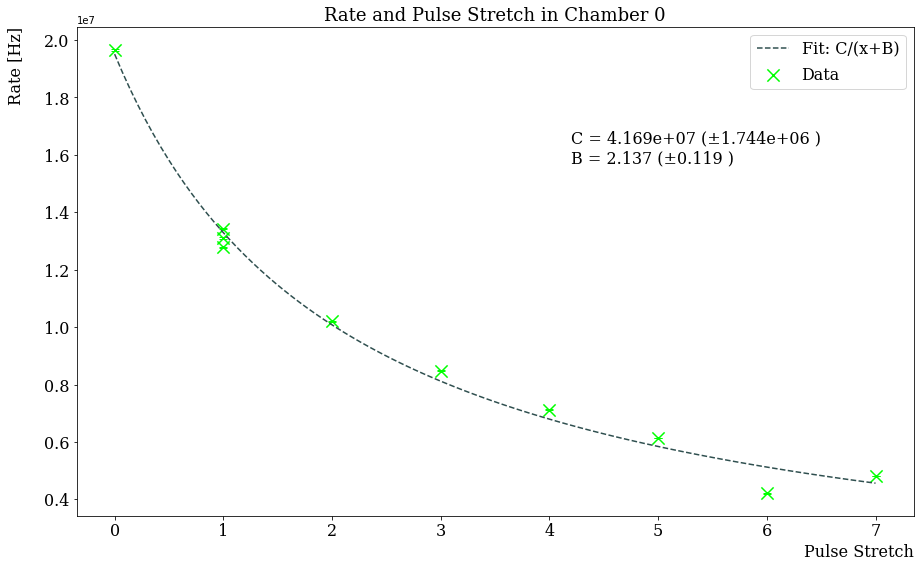

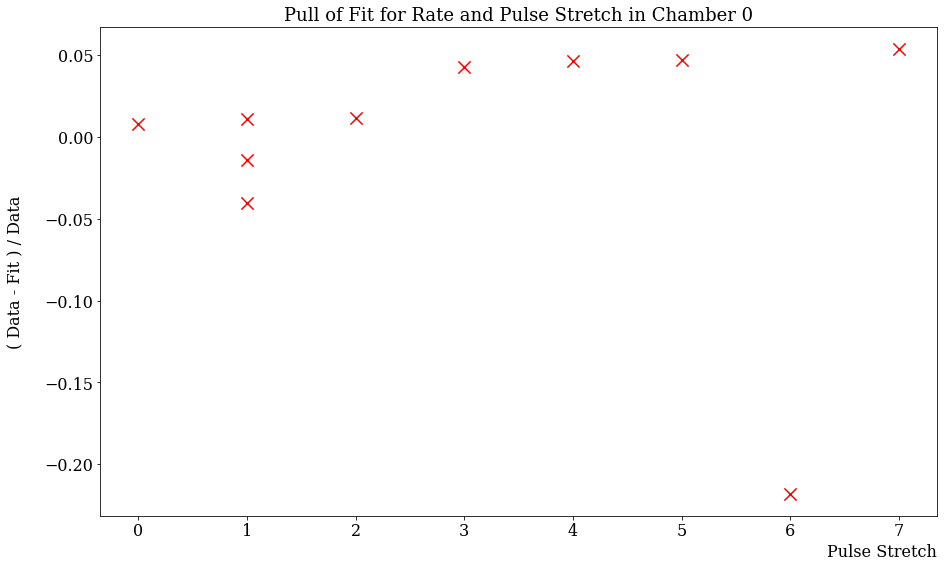

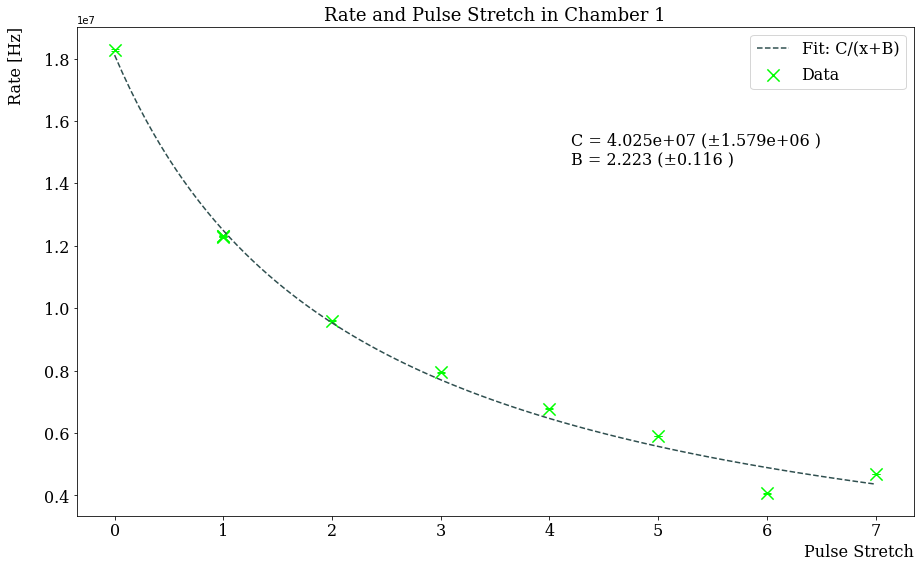

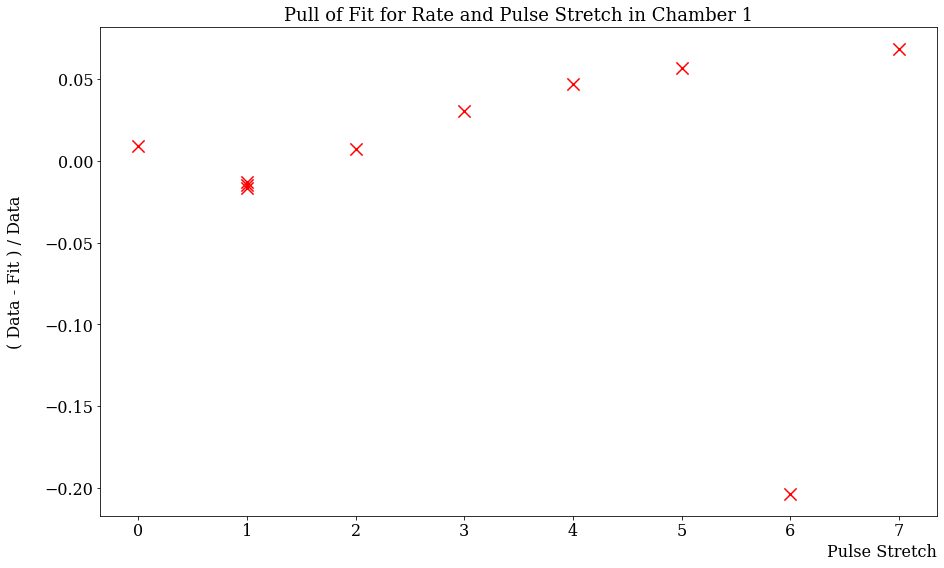

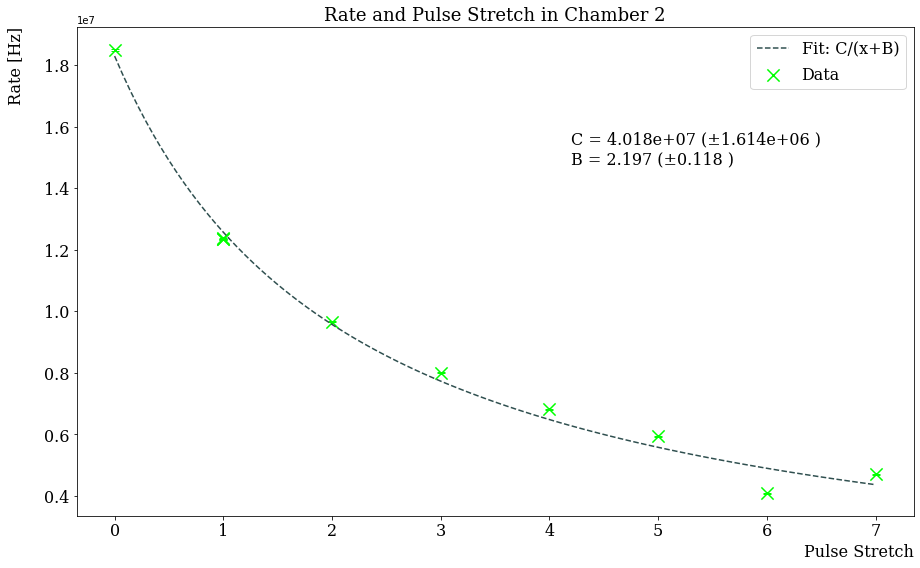

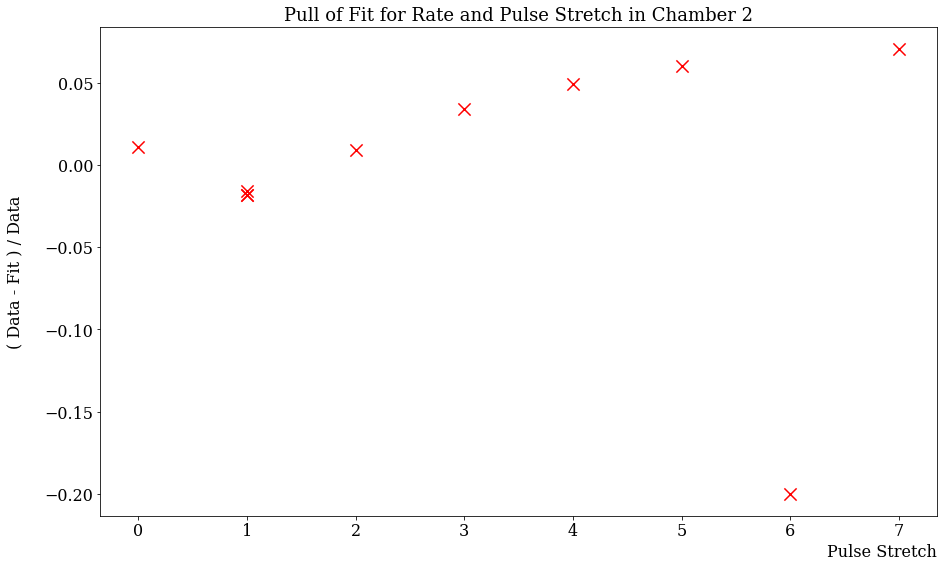

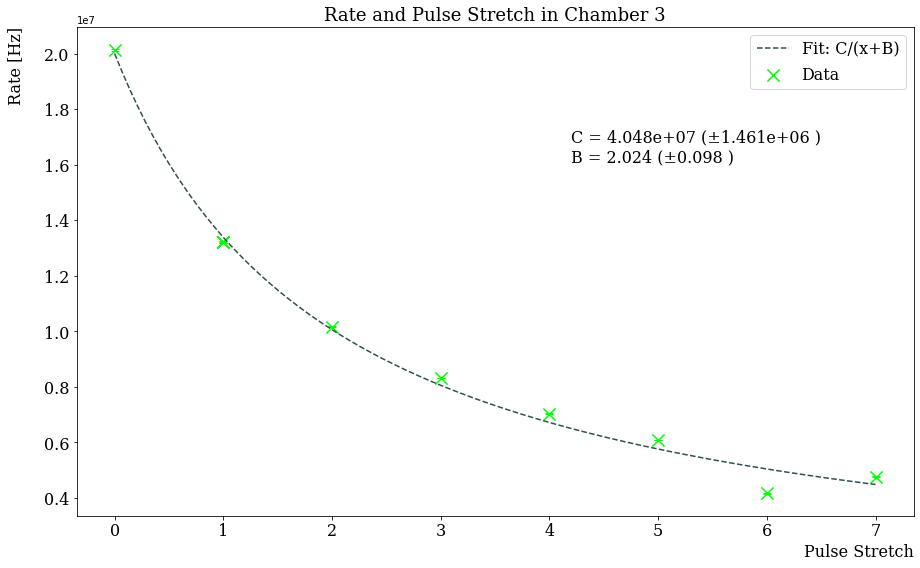

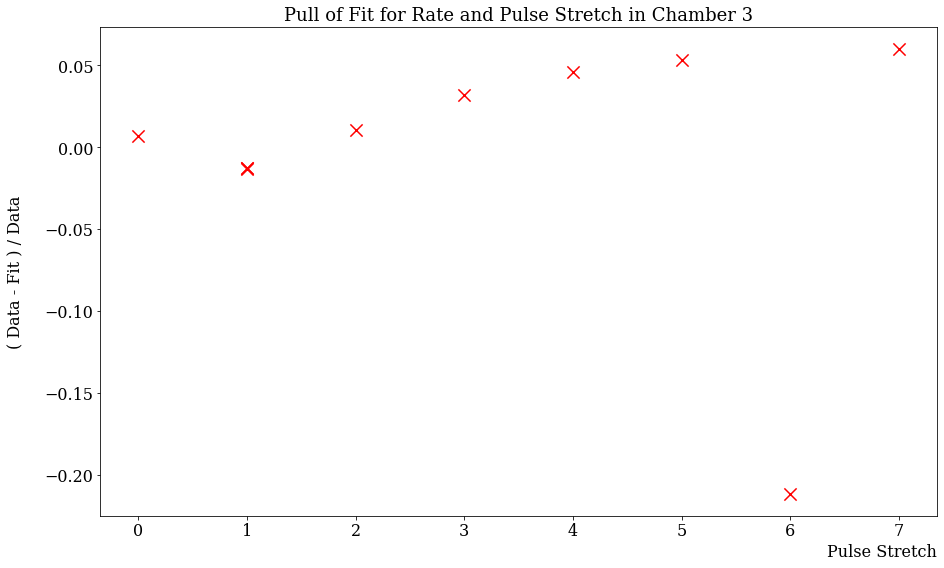

In [14]:
def over_x(x, C, B):
    return ( C / (x+B) )

runs = {350:0, 351:1, 352:1, 353:1, 354:2, 355:3, 356:4, 357:5, 358:6, 359:7}

data_chamber = {}
data_eta = {}
data_av_strip = {}
data_strip = {}

chambers = []
chamber_rate = []
eta_rate = []

unique_chambers = [0,1,2,3]

unique_etas = [1,2,3,4]

font_title = {'family':'serif','color':'black','size':18}
font_axes = {'family':'serif','color':'black','size':16}
font_ticks = {'family':'serif','color':'black','size':16}
font_legend = {'family':'serif', 'size':16}

for run in runs.keys():
    
    temp = pd.read_csv("Rate_per_Chamber_Run-"+str(run)+".csv")
    data_chamber[run]=temp

    temp = pd.read_csv("Rate_per_Eta_Run-"+str(run)+".csv")
    data_eta[run]=temp
    
    temp = pd.read_csv("Average_Rate_per_Strip_Run-"+str(run)+".csv")
    data_av_strip[run]= temp
    
    temp = pd.read_csv("Rate_per_Strip_Run-"+str(run)+".csv")
    data_strip[run]=temp
    
for ch in unique_chambers:
    
    x = []
    y = []
    y_err = []
    
    for run in data_chamber.keys():
        
        temp1 = data_chamber[run]
        cut1 = temp1["Chamber"] == ch
        temp1 = temp1[cut1]
        
        x.append(runs[run])
        y.append(temp1["Rate"][ch])
        y_err.append(temp1["Error"][ch])
        
    fig, ax = plt.subplots(1,1)

    fig.set_size_inches(15, 9)
        
    plt.scatter( x, y, marker = 'x', s = 150, label = 'Data', color = "lime")
    plt.errorbar( x, y, yerr=y_err, linestyle='', capsize=4, color = 'lime')
    
    guess = [(max(y)-min(y))/(max(x)-min(x)),1]
    i = 0
    while i  < 3:
        param,cov = curve_fit(over_x, x, y, p0=guess)
        guess = param
        i += 1
    x_fit = np.linspace(min(x), max(x) ,100)
    y_fit = over_x(x_fit, param[0], param[1])
    plt.plot(x_fit, y_fit, color='darkslategrey', linestyle='--', label='Fit: C/(x+B)' )

    plt.xlabel('Pulse Stretch', loc = 'right',fontdict = font_axes)
    plt.ylabel('Rate [Hz]', loc = 'top', fontdict = font_axes, labelpad = 20)
    plt.xticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
    plt.yticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
    ax.set_title("Rate and Pulse Stretch in Chamber "+str(ch), fontdict = font_title)
    
    plt.legend(prop = font_legend)
    plt.text(0.6*max(x), 0.8*max(y), "C = "+str(np.format_float_scientific(param[0],3))+" ("+u"\u00B1"+str(np.format_float_scientific(np.sqrt(cov[0][0]),3))+" )"+"\nB = "+str(np.round(param[1],3))+" ("+u"\u00B1"+str(round(np.sqrt(cov[1][1]),3))+" )",fontdict=font_ticks)
    
    plt.savefig("Rate_vs_Pulse_Stretch_Chamber_"+str(ch)+".png")
    plt.show()
    plt.close()
    
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(15, 9)
    plt.scatter( x, (y - over_x(x, param[0],param[1])) / y , marker = 'x', s = 150, label = 'Pulls', color = "red")
    plt.xlabel('Pulse Stretch', loc = 'right',fontdict = font_axes)
    plt.ylabel('( Data - Fit ) / Data', loc = 'center', fontdict = font_axes, labelpad = 20)
    plt.xticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
    plt.yticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
    ax.set_title("Pull of Fit for Rate and Pulse Stretch in Chamber "+str(ch), fontdict = font_title)
    plt.show()
    plt.close()

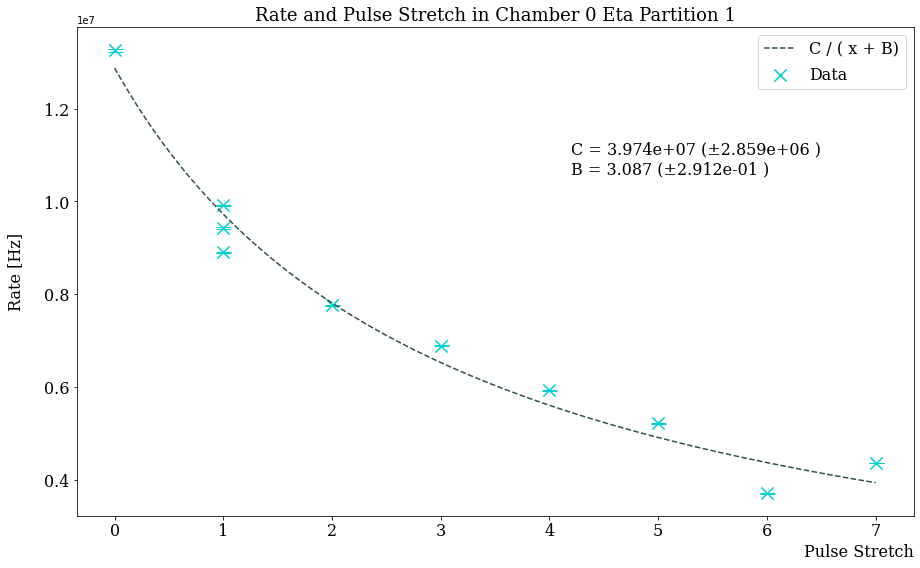

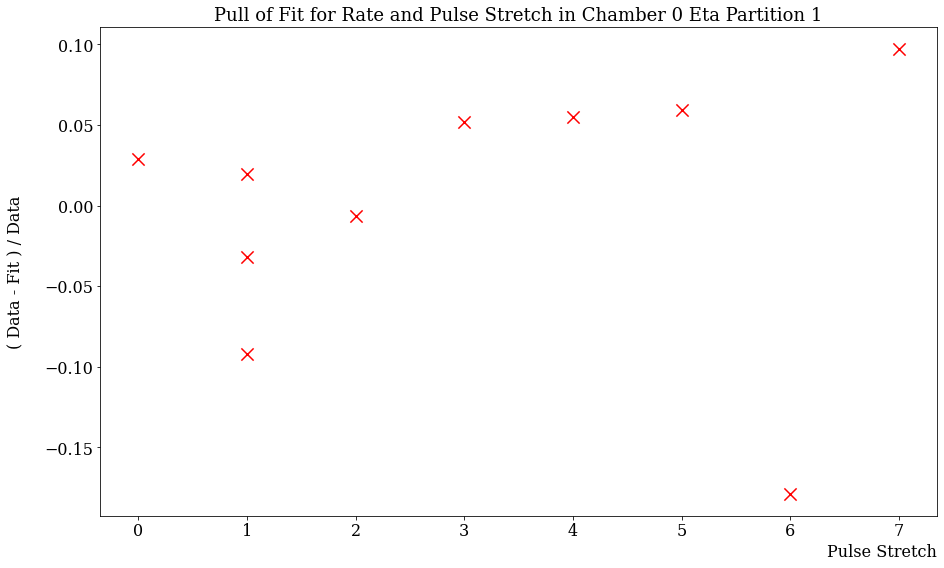

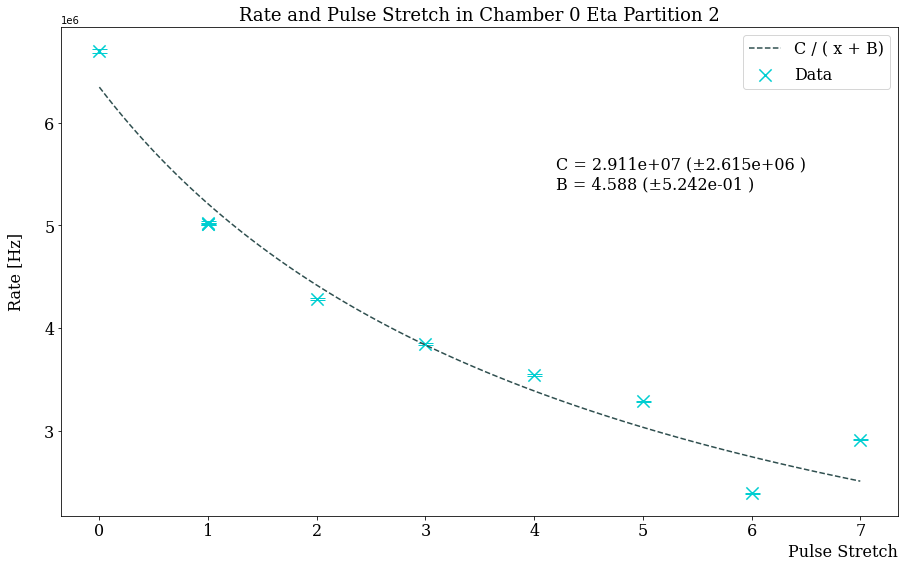

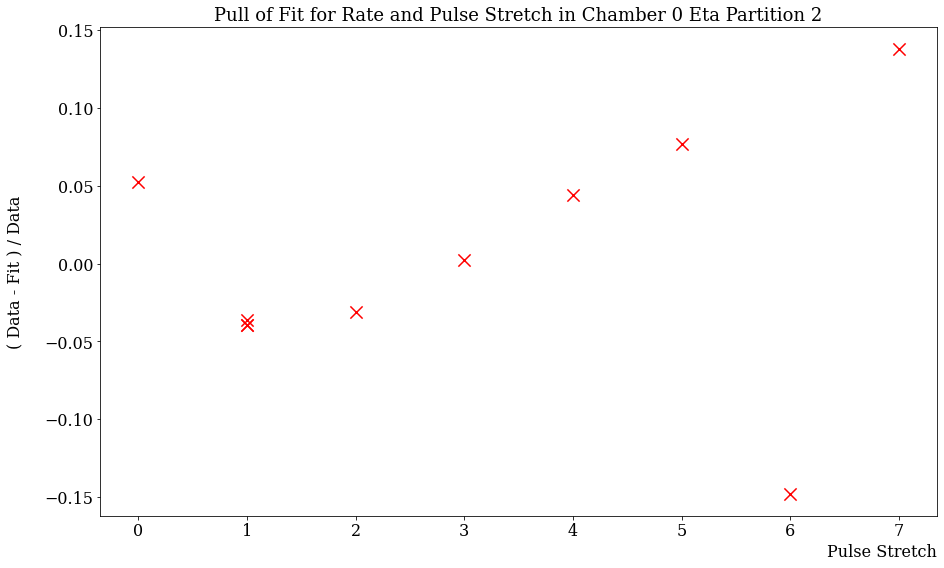

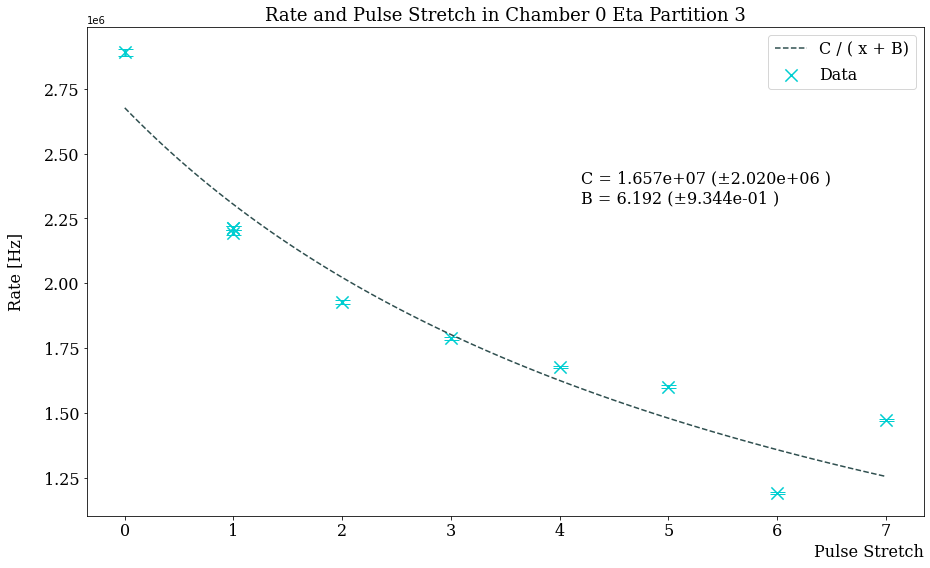

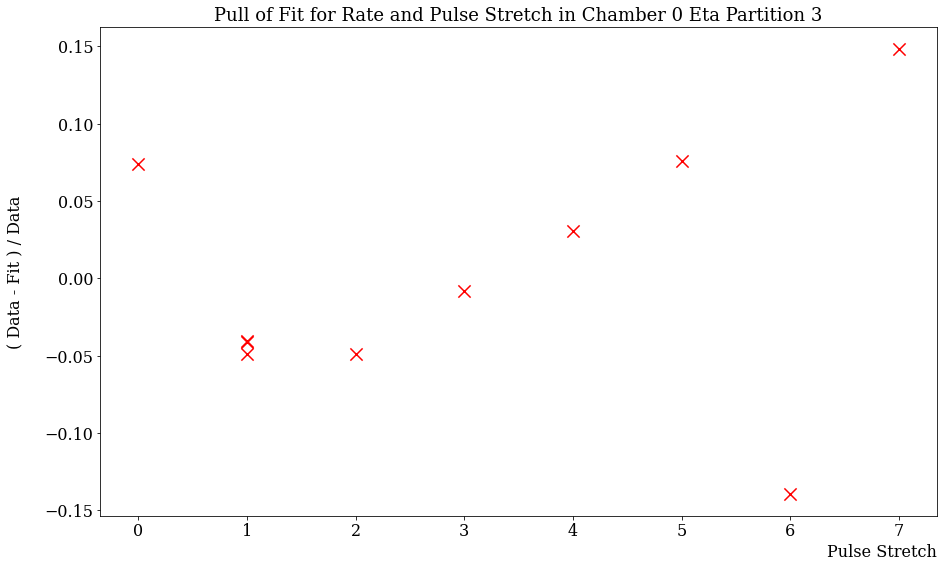

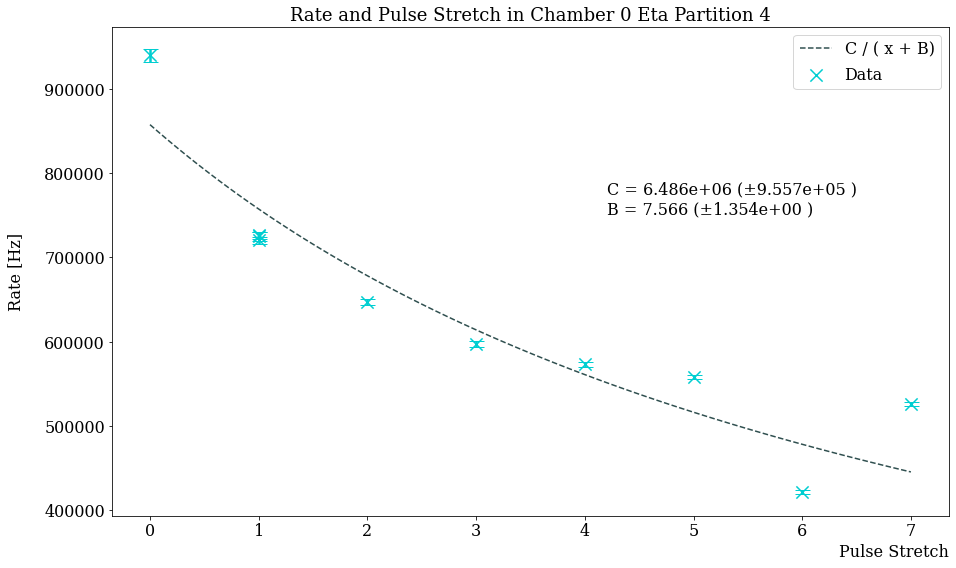

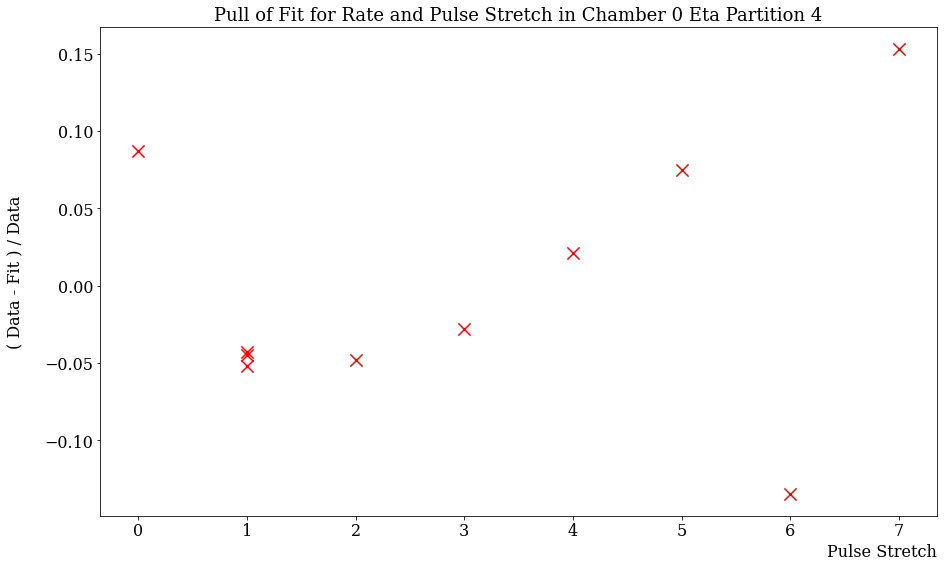

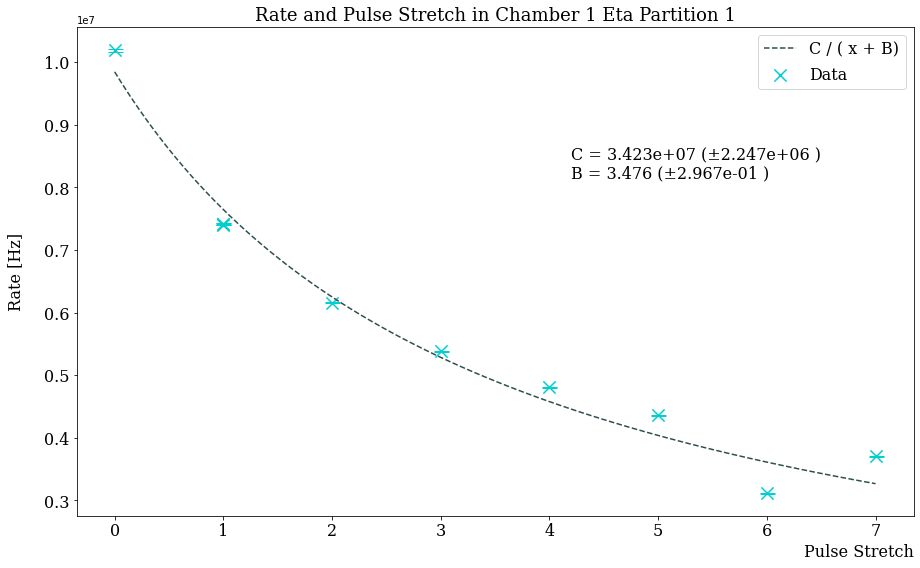

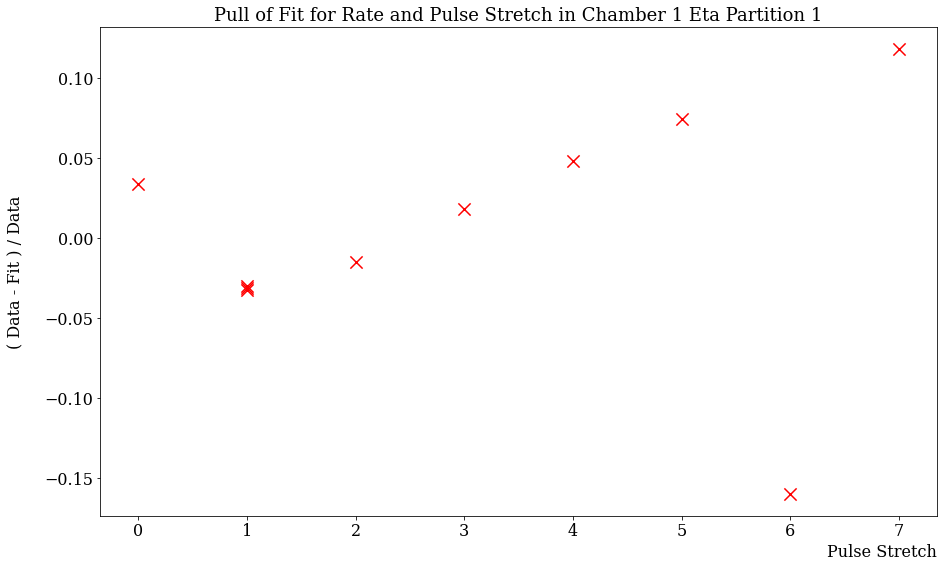

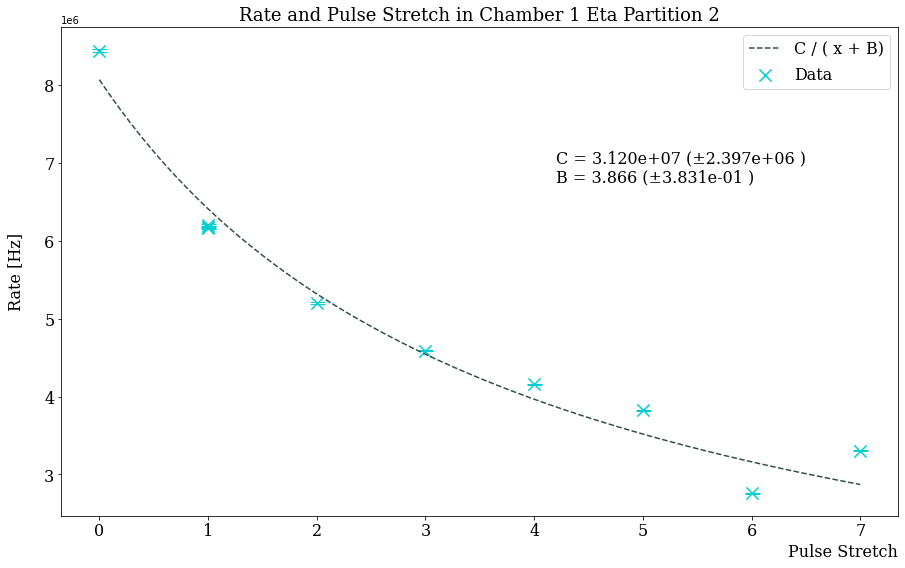

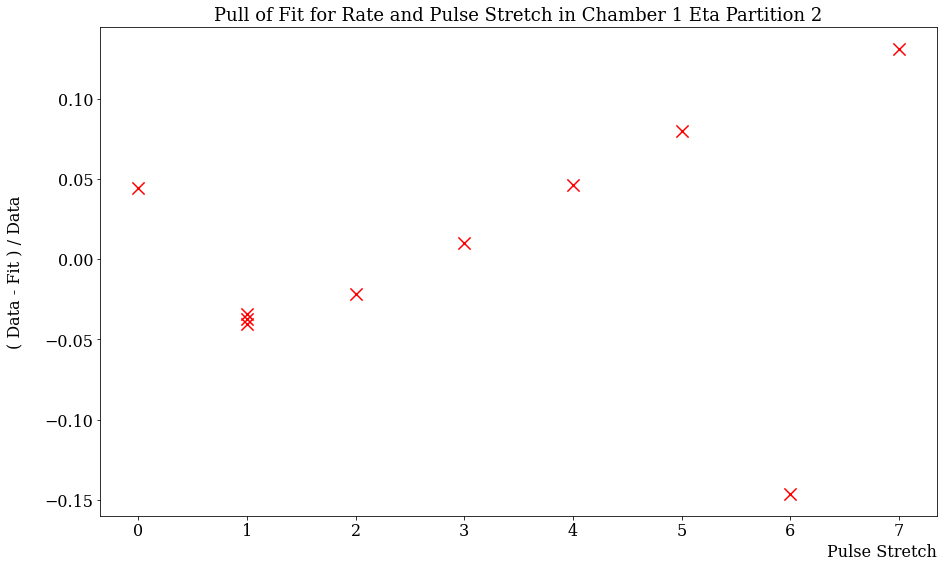

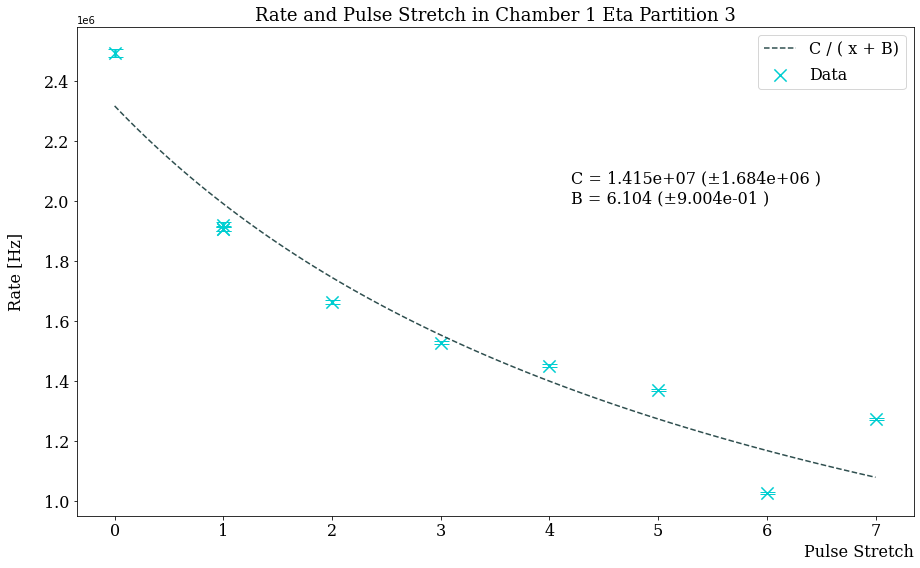

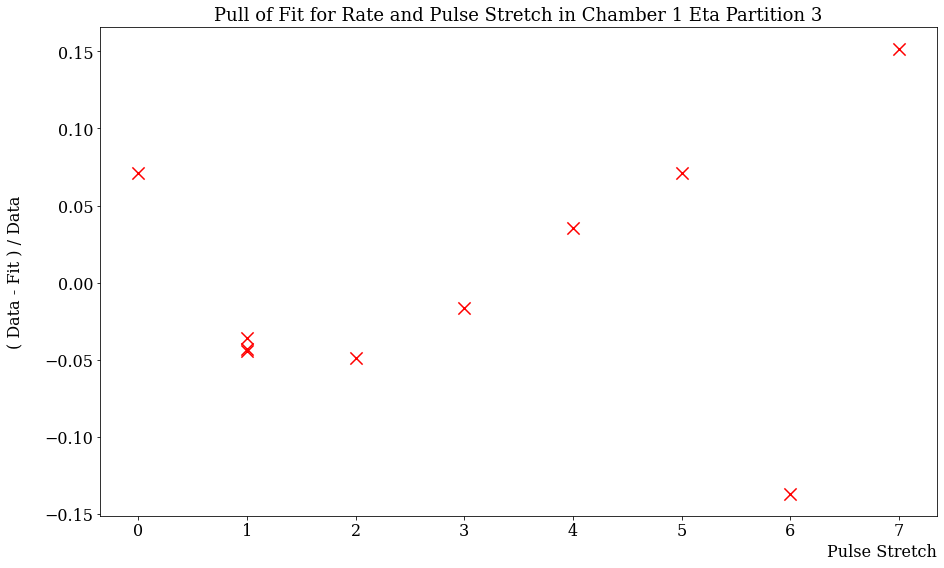

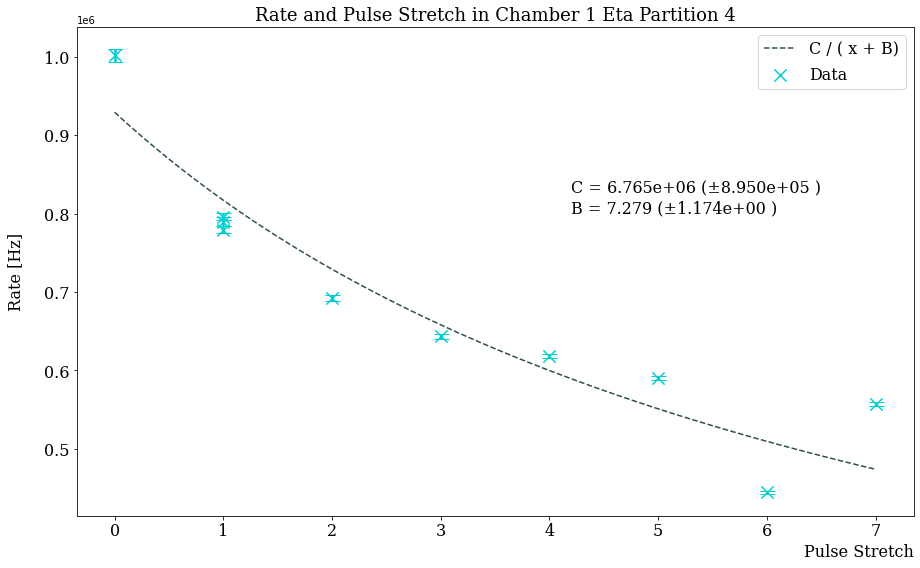

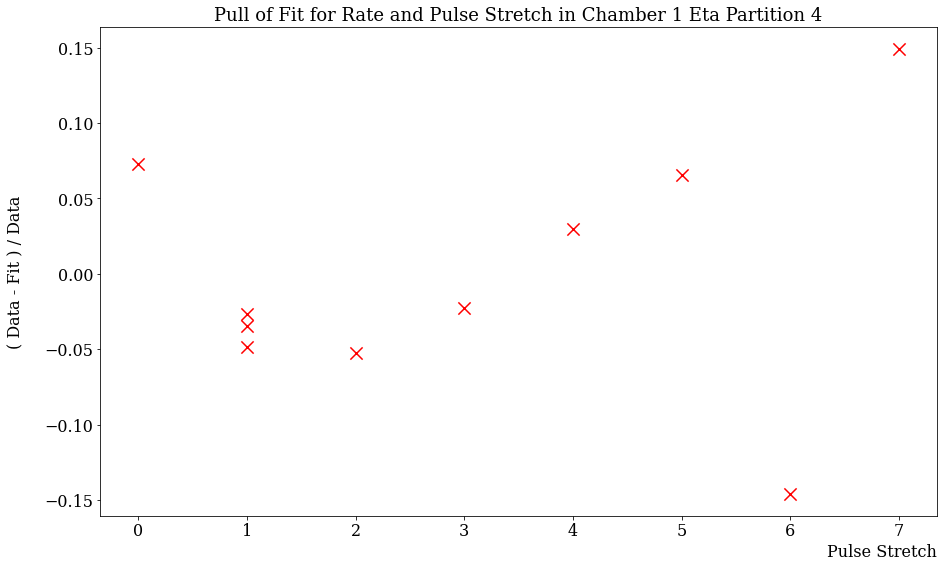

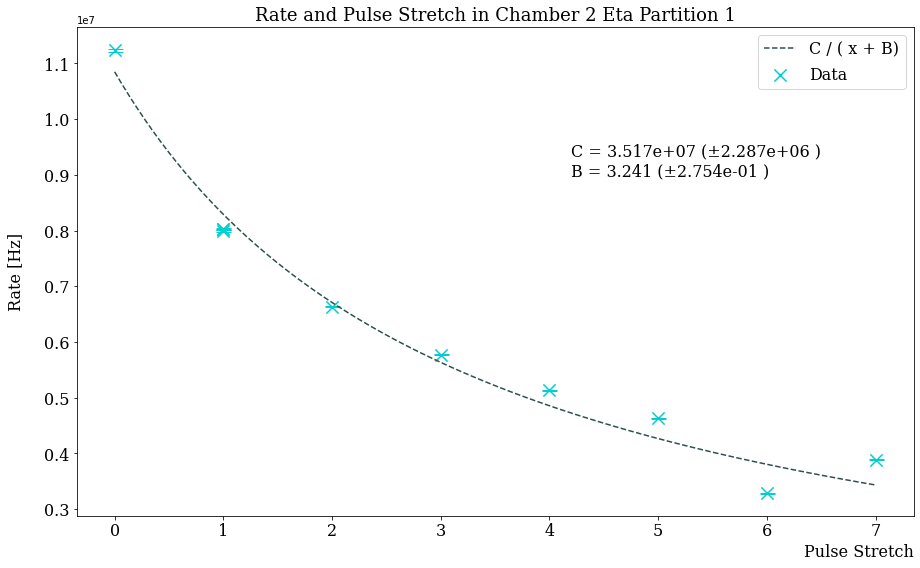

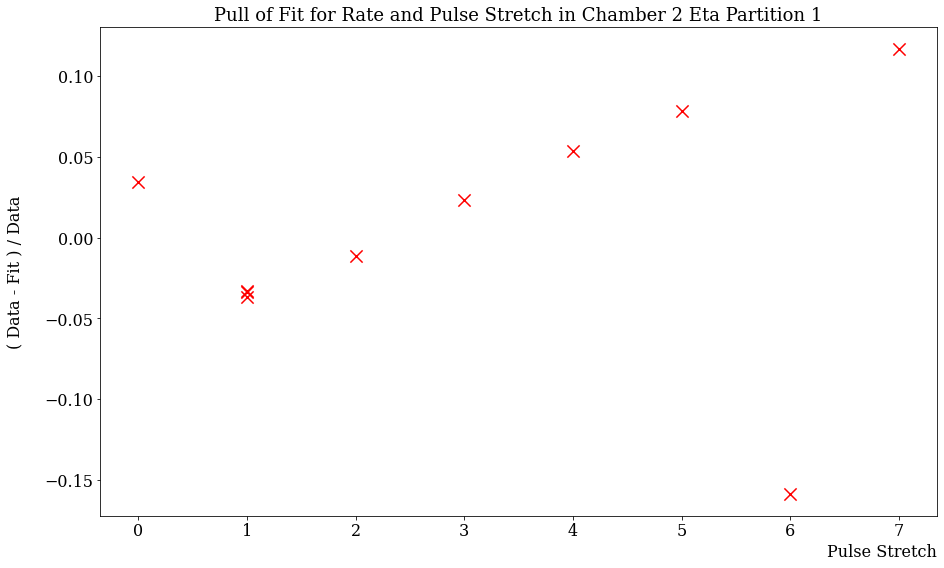

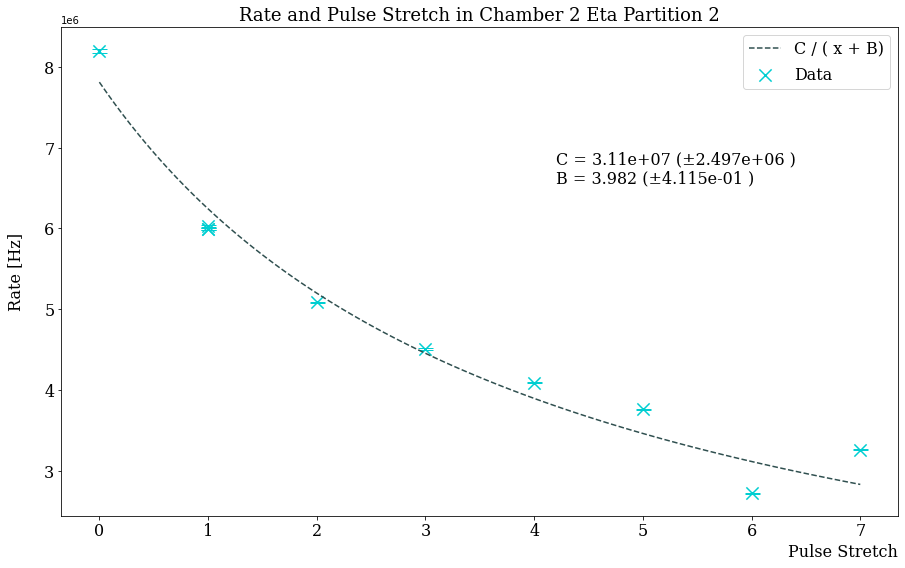

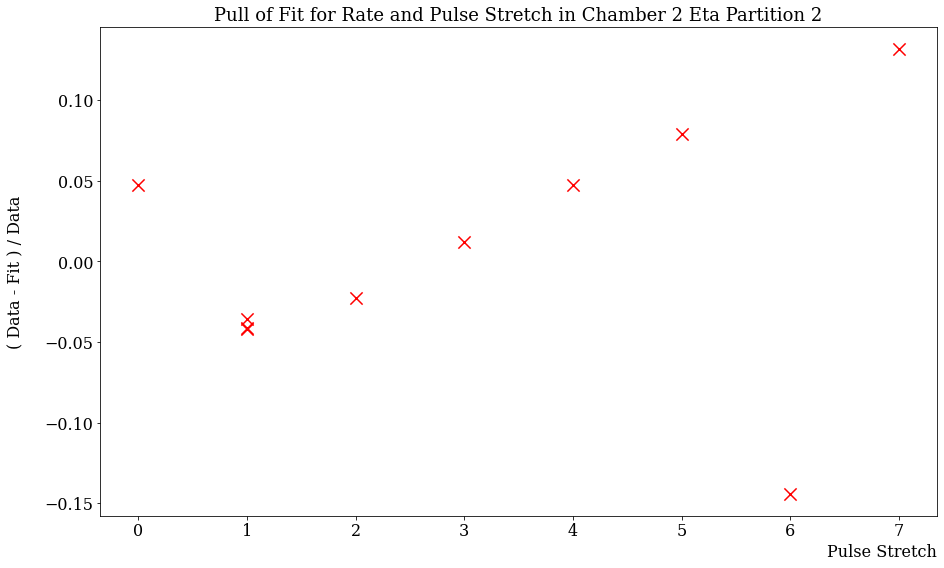

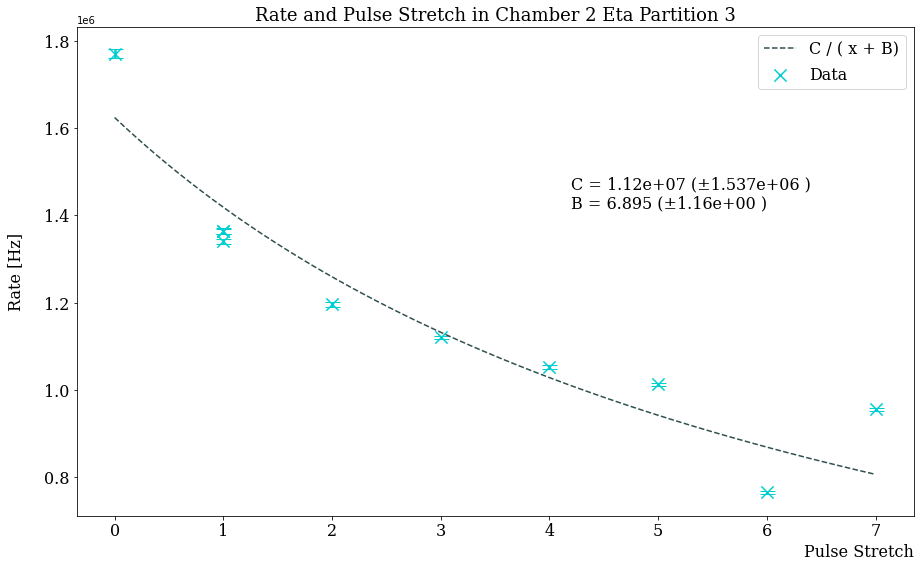

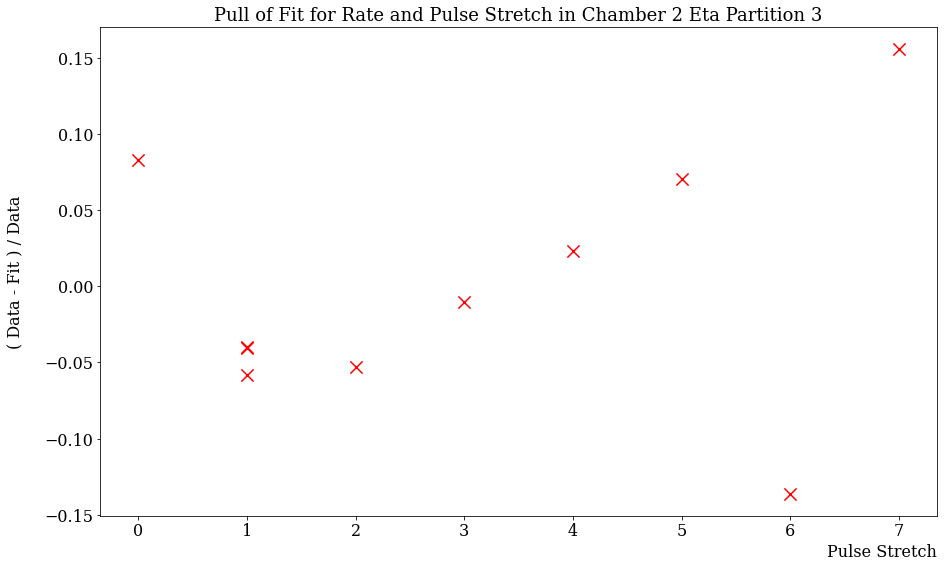

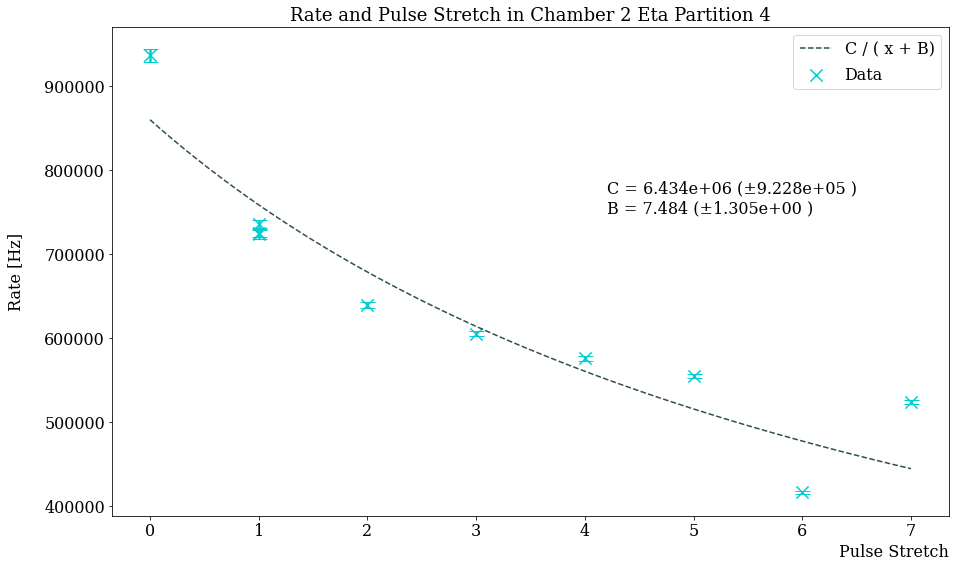

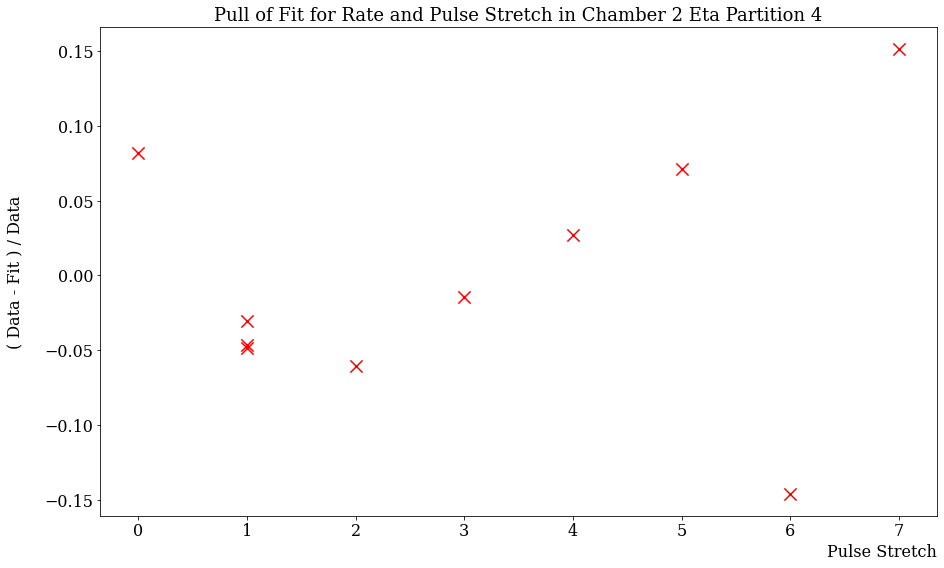

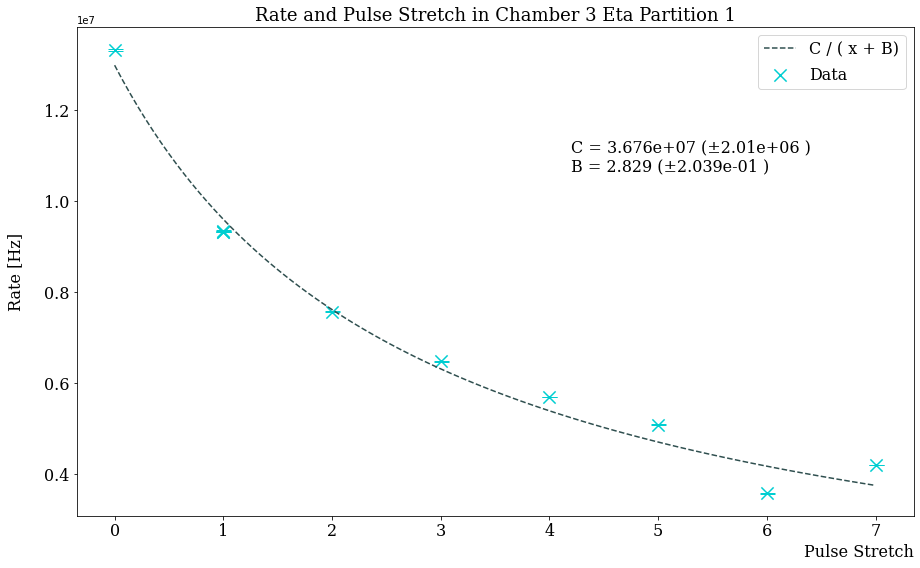

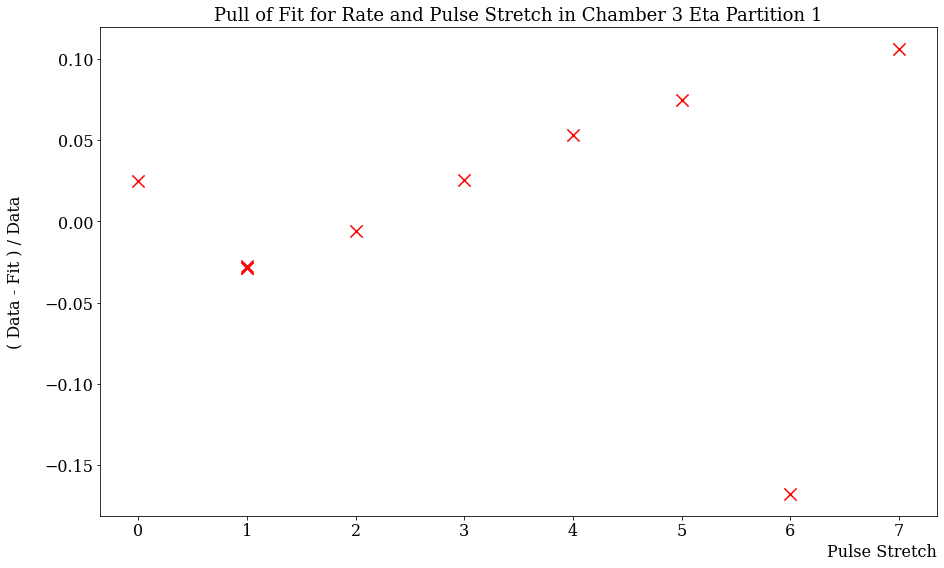

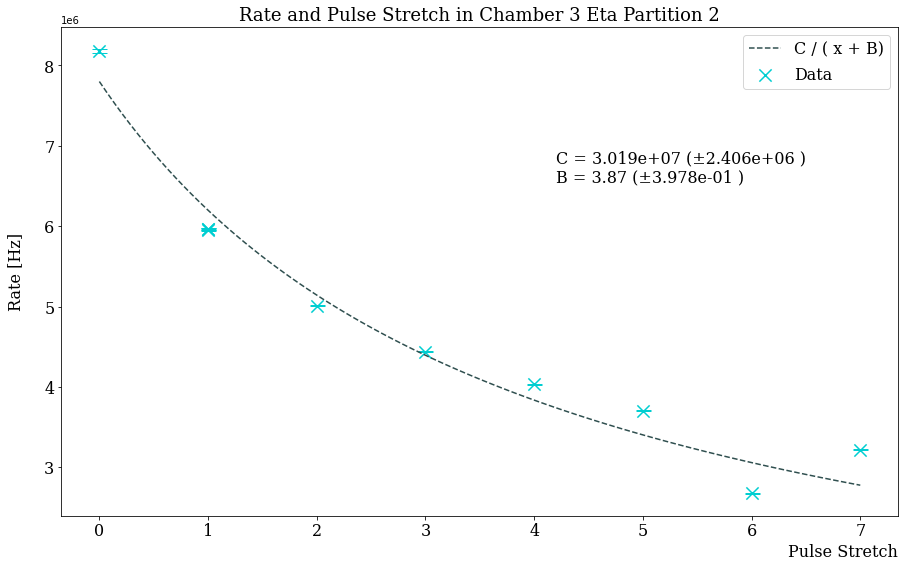

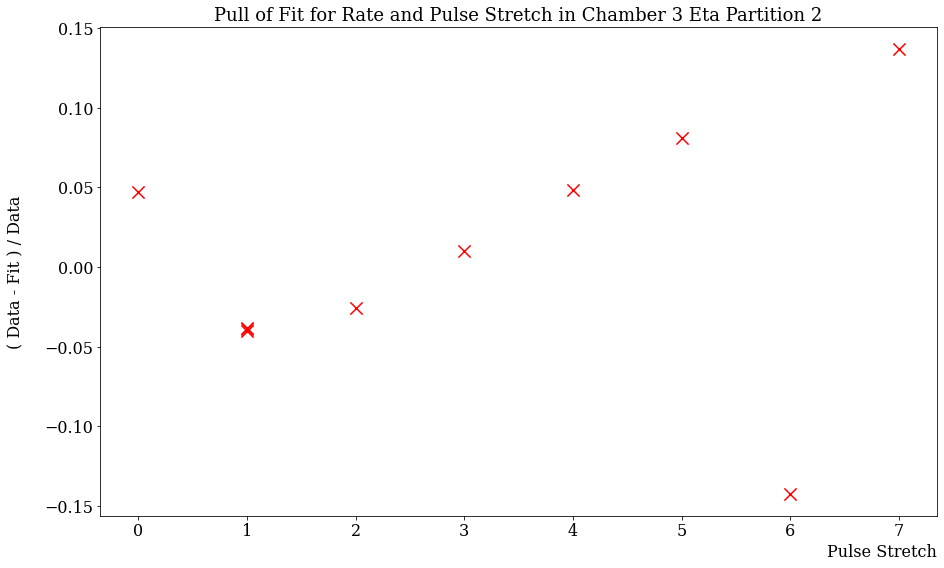

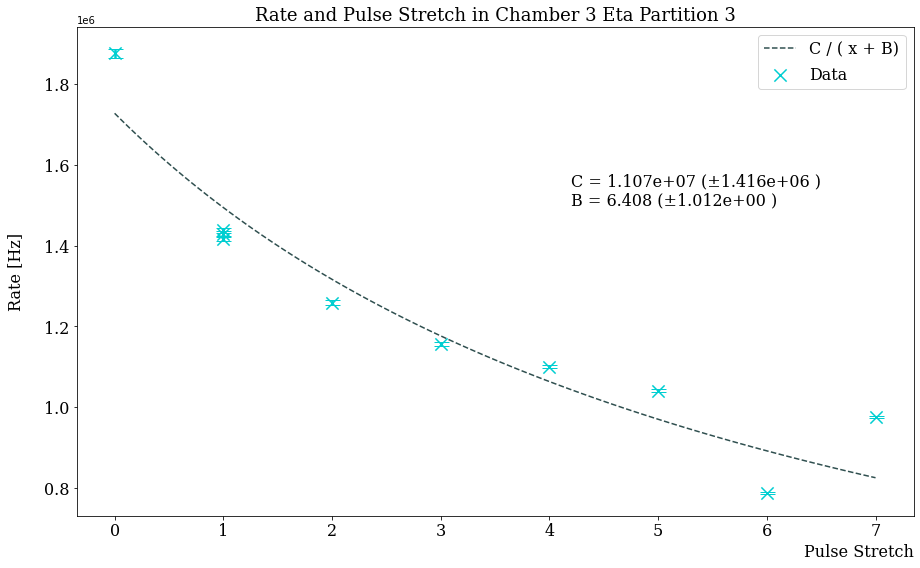

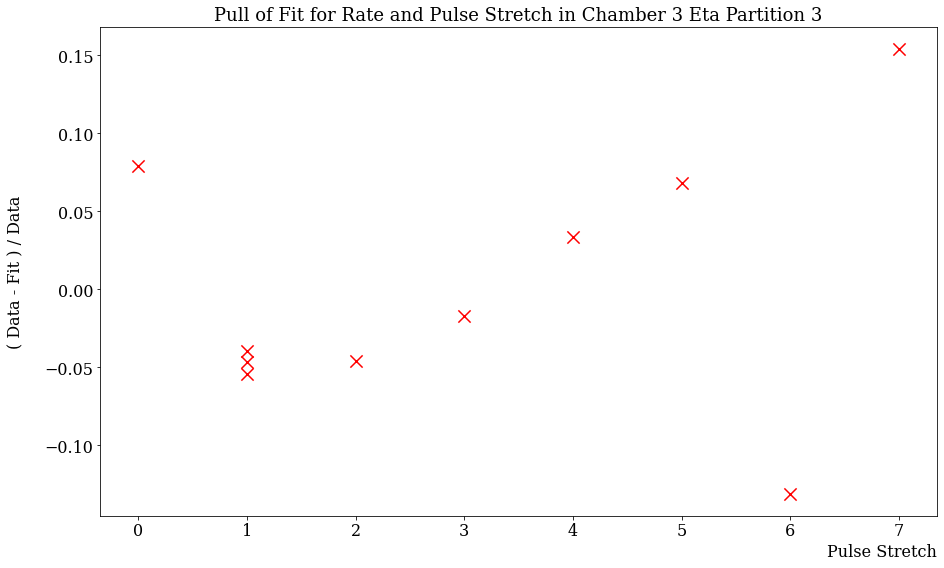

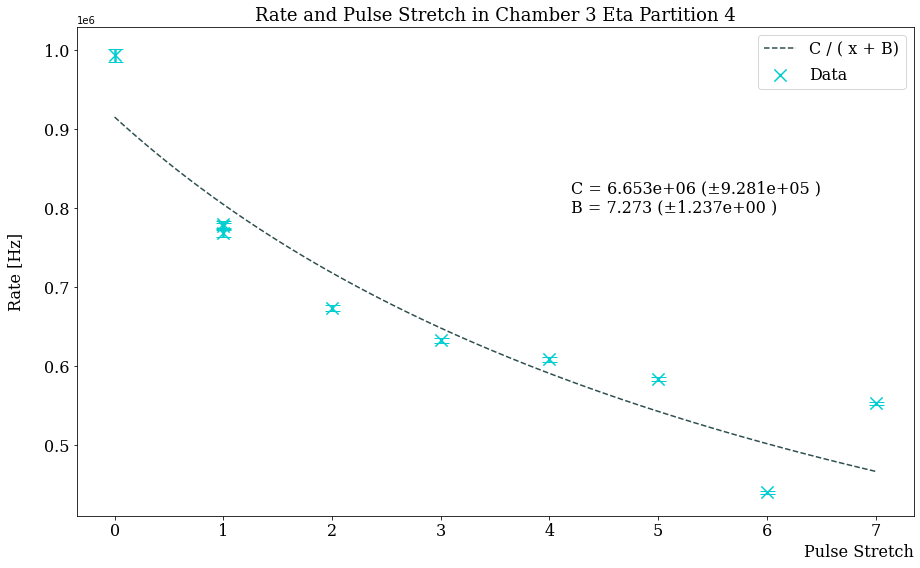

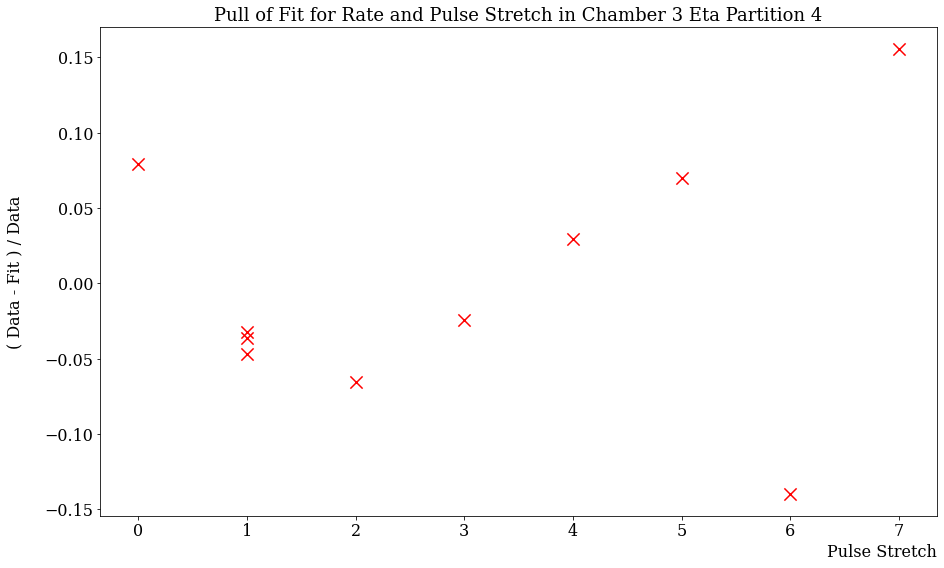

In [3]:
def over_x(x, C, B):
    return ( C / (x+B) )

runs = {350:0, 351:1, 352:1, 353:1, 354:2, 355:3, 356:4, 357:5, 358:6, 359:7}

data_chamber = {}
data_eta = {}
data_av_strip = {}
data_strip = {}

chambers = []
chamber_rate = []
eta_rate = []

unique_chambers = [0,1,2,3]

unique_etas = [1,2,3,4]

font_title = {'family':'serif','color':'black','size':18}
font_axes = {'family':'serif','color':'black','size':16}
font_ticks = {'family':'serif','color':'black','size':16}
font_legend = {'family':'serif','size':16}

for run in runs.keys():
    
    temp = pd.read_csv("Rate_per_Chamber_Run-"+str(run)+".csv")
    data_chamber[run]=temp

    temp = pd.read_csv("Rate_per_Eta_Run-"+str(run)+".csv")
    data_eta[run]=temp
    
    temp = pd.read_csv("Average_Rate_per_Strip_Run-"+str(run)+".csv")
    data_av_strip[run]= temp
    
    temp = pd.read_csv("Rate_per_Strip_Run-"+str(run)+".csv")
    data_strip[run]=temp

ind = 0
for ch in unique_chambers:
    
    for et in unique_etas:
    
        x = []
        y = []
        y_err = []

        for run in data_eta.keys():

            temp1 = data_eta[run]
            cut1 = temp1["Chamber"] == ch
            cut2 = temp1["Eta"] == et
            cut_sum = np.logical_and(cut1, cut2)
            temp1 = temp1[cut_sum]

            x.append(runs[run])
            y.append(temp1["Rate"][ind])
            y_err.append(temp1["Error"][ind])
            
        fig, ax = plt.subplots(1,1)

        fig.set_size_inches(15, 9)

        plt.scatter( x, y, marker = 'x', s = 150, label = 'Data', color = "darkturquoise")
        plt.errorbar( x, y, yerr=y_err, linestyle='', elinewidth=2.5, capsize=7.5, color = 'darkturquoise')

        guess = [(max(y)-min(y))/(max(x)-min(x)),1]
        i = 0
        while i  < 3:
            param,cov = curve_fit(over_x, x, y, p0=guess)
            guess = param
            i += 1
        x_fit = np.linspace(min(x), max(x) ,100)
        y_fit = over_x(x_fit, param[0],param[1])
        plt.plot(x_fit, y_fit, color='darkslategrey', linestyle='--', label='C / ( x + B)' )

        plt.xlabel('Pulse Stretch', loc = 'right',fontdict = font_axes)
        plt.ylabel('Rate [Hz]', loc = 'center', fontdict = font_axes, labelpad = 20)
        plt.xticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
        plt.yticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
        ax.set_title("Rate and Pulse Stretch in Chamber "+str(ch)+" Eta Partition "+str(et), fontdict = font_title)

        plt.legend(prop = font_legend)
        plt.text(0.6*max(x), 0.8*max(y), "C = "+str(np.format_float_scientific(param[0],3))+" ("+u"\u00B1"+str(np.format_float_scientific(np.sqrt(cov[0][0]),3))+" )"+"\nB = "+str(np.round(param[1],3))+" ("+u"\u00B1"+str(np.format_float_scientific(np.sqrt(cov[1][1]),3))+" )",fontdict=font_ticks)

        plt.show()

        plt.close()
        
        ind+=1
        
        fig, ax = plt.subplots(1,1)

        fig.set_size_inches(15, 9)
    
        plt.scatter( x, (y - over_x(x, param[0],param[1])) / y , marker = 'x', s = 150, label = 'Pulls', color = "red")
        plt.xlabel('Pulse Stretch', loc = 'right',fontdict = font_axes)
        plt.ylabel('( Data - Fit ) / Data', loc = 'center', fontdict = font_axes, labelpad = 20)
        plt.xticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
        plt.yticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
        ax.set_title("Pull of Fit for Rate and Pulse Stretch in Chamber "+str(ch)+" Eta Partition "+str(et), fontdict = font_title)
        plt.show()
        plt.close()

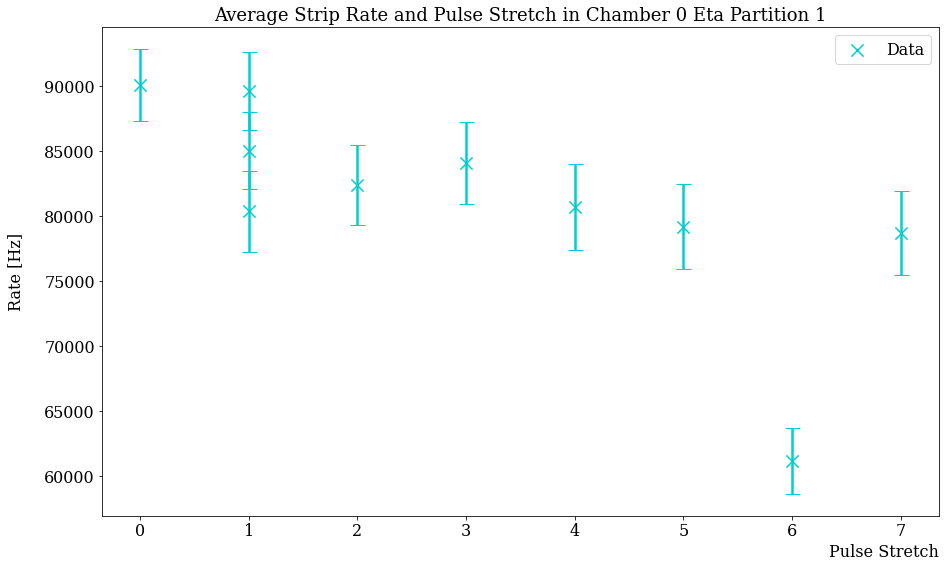

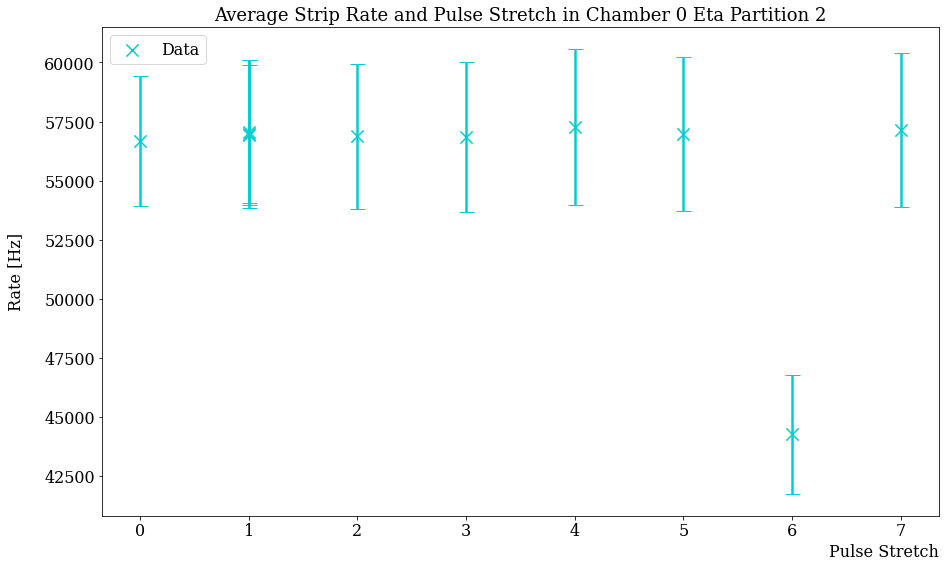

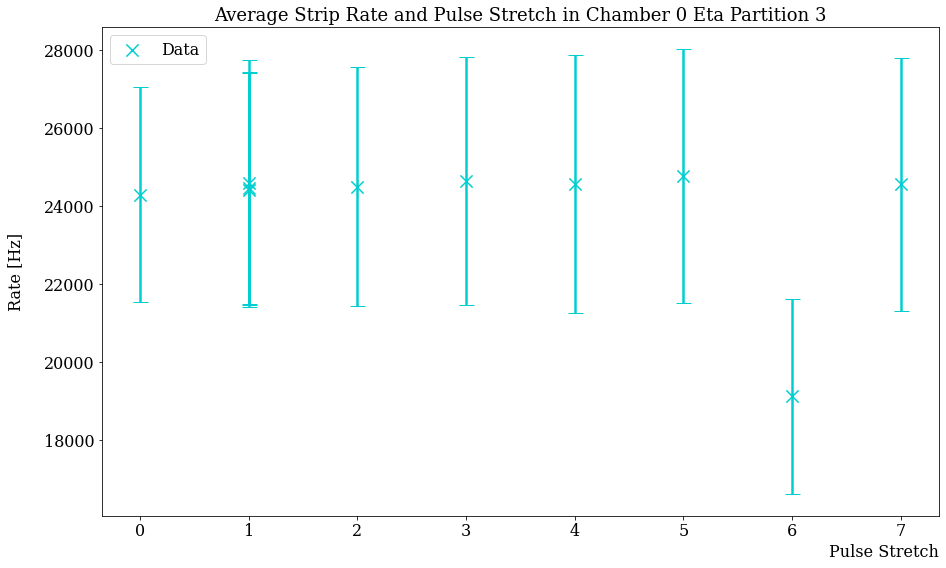

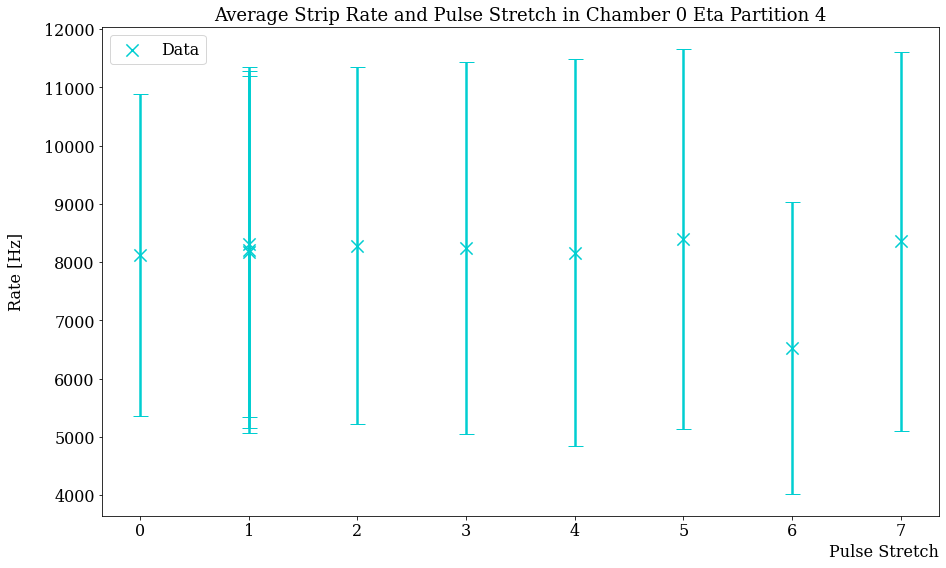

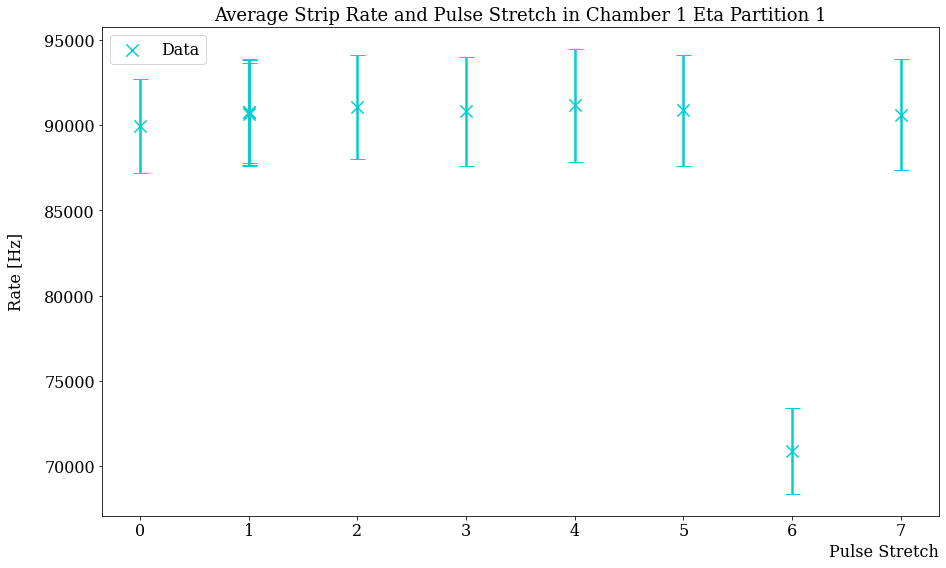

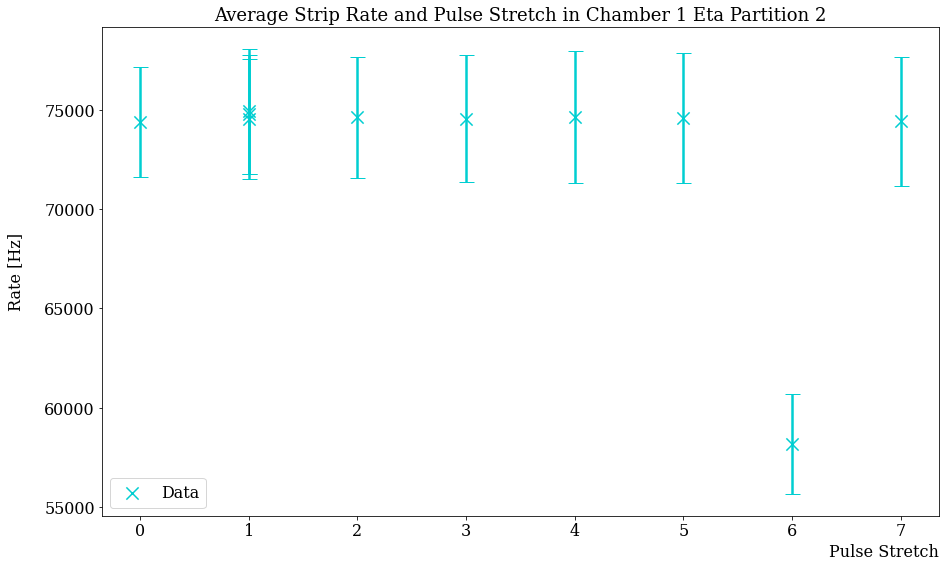

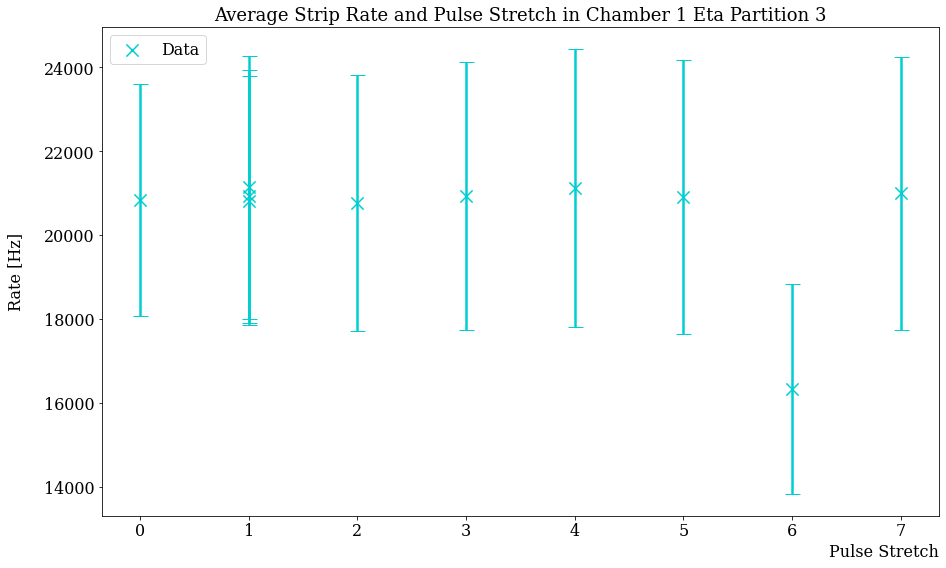

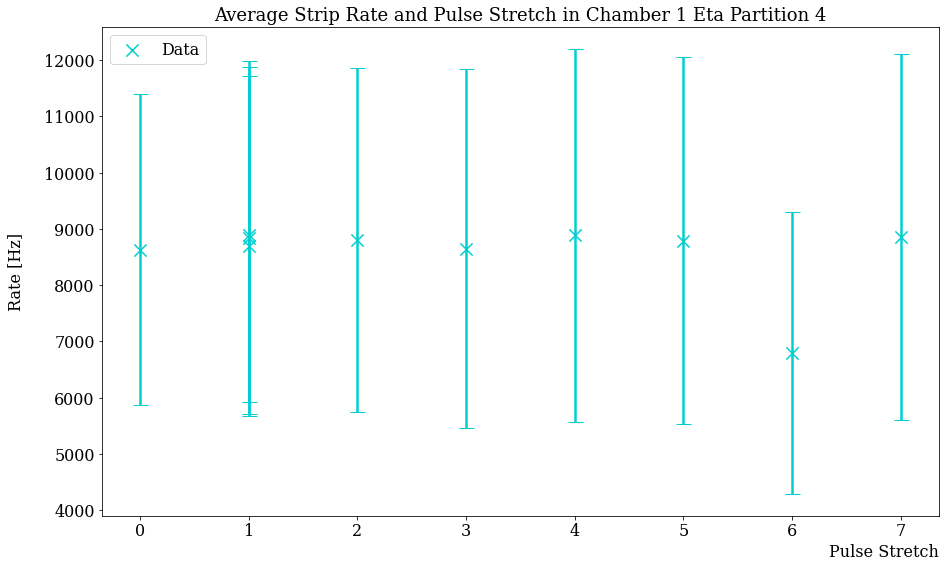

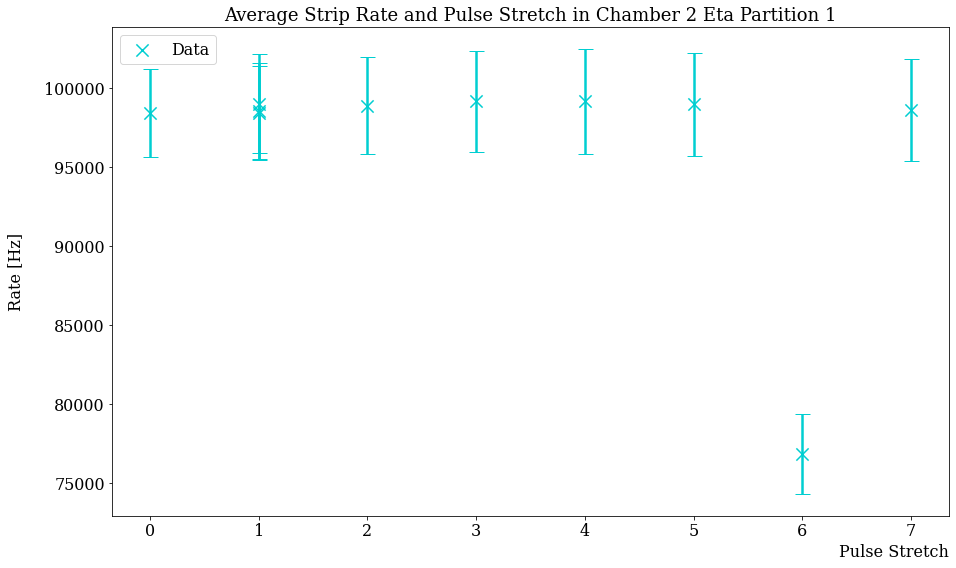

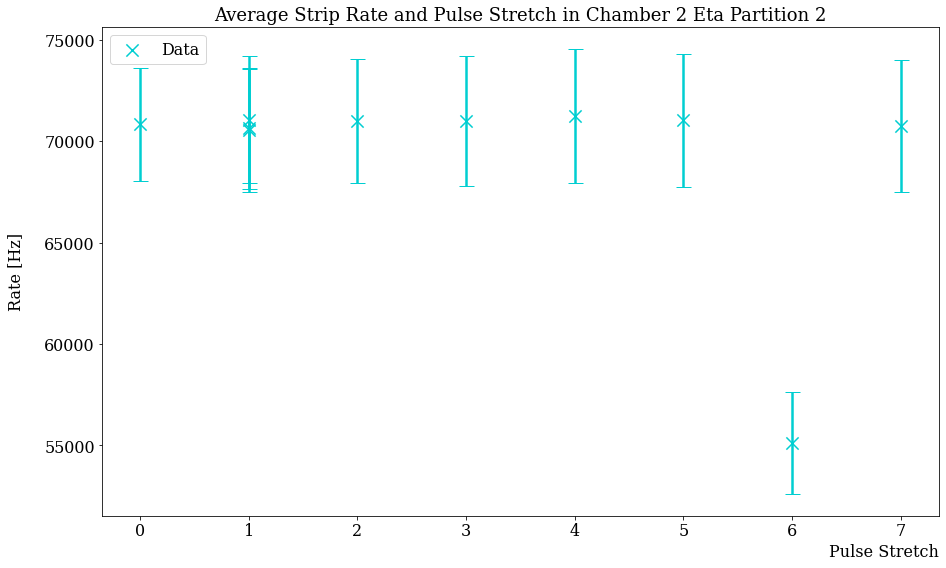

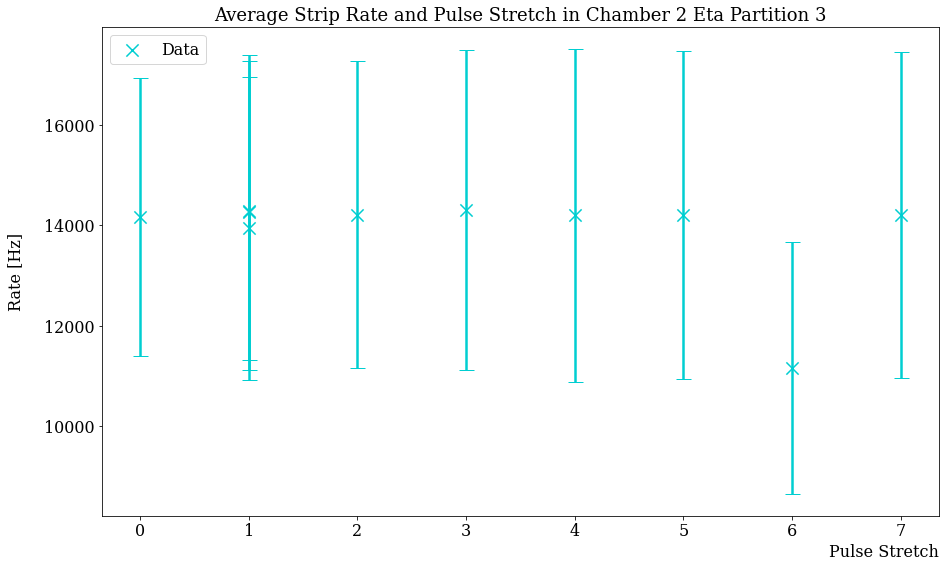

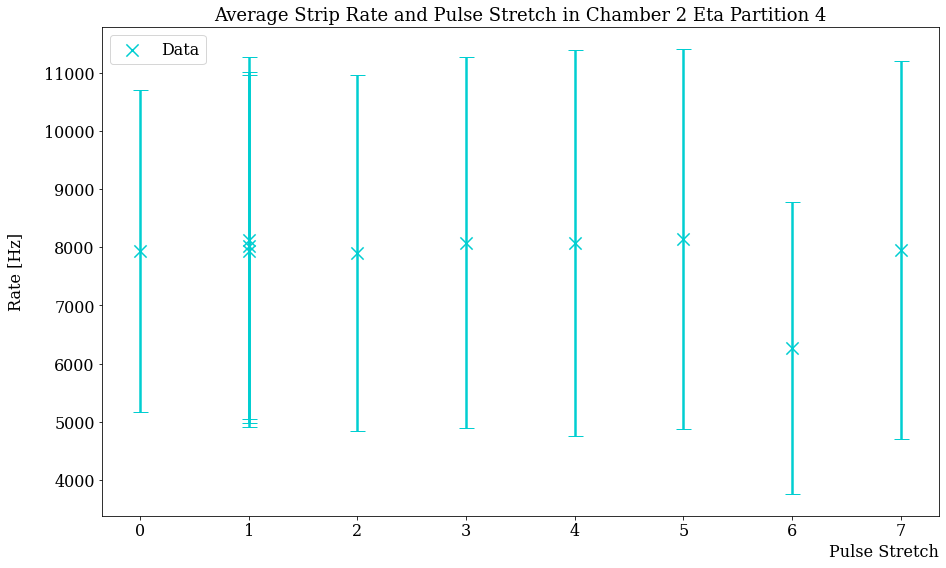

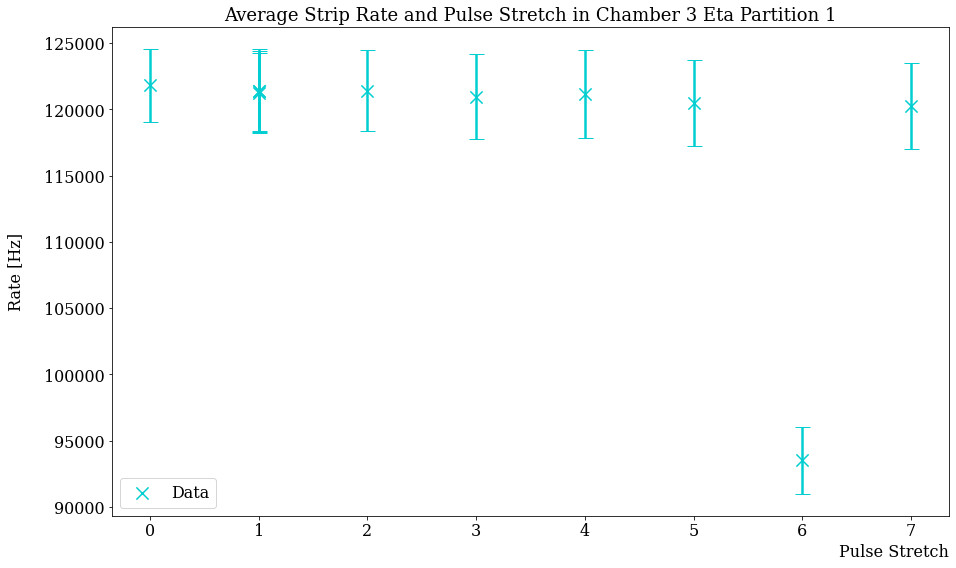

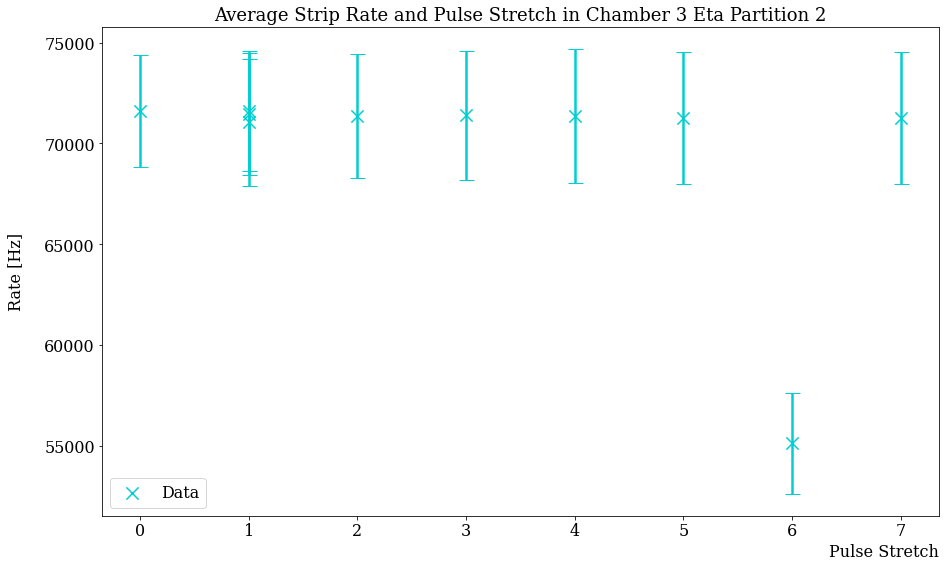

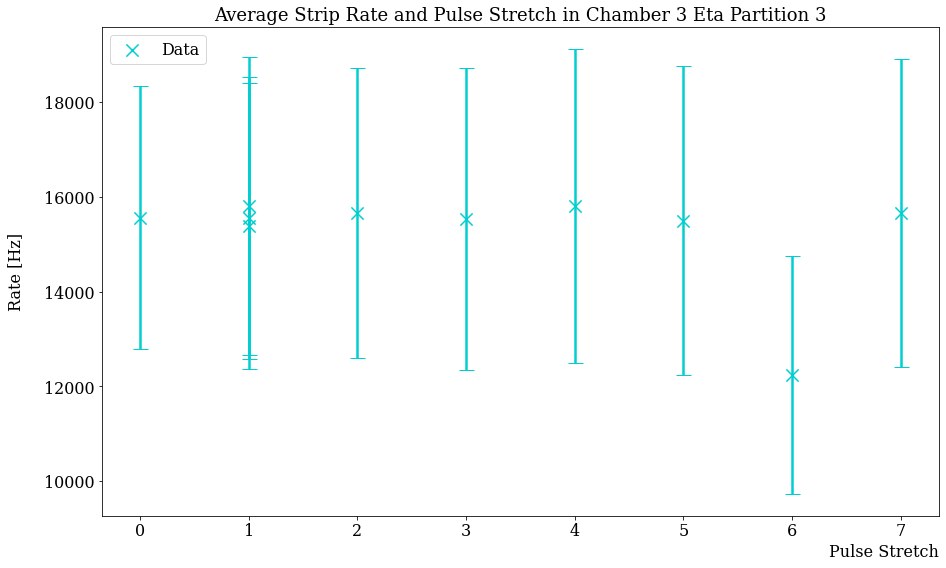

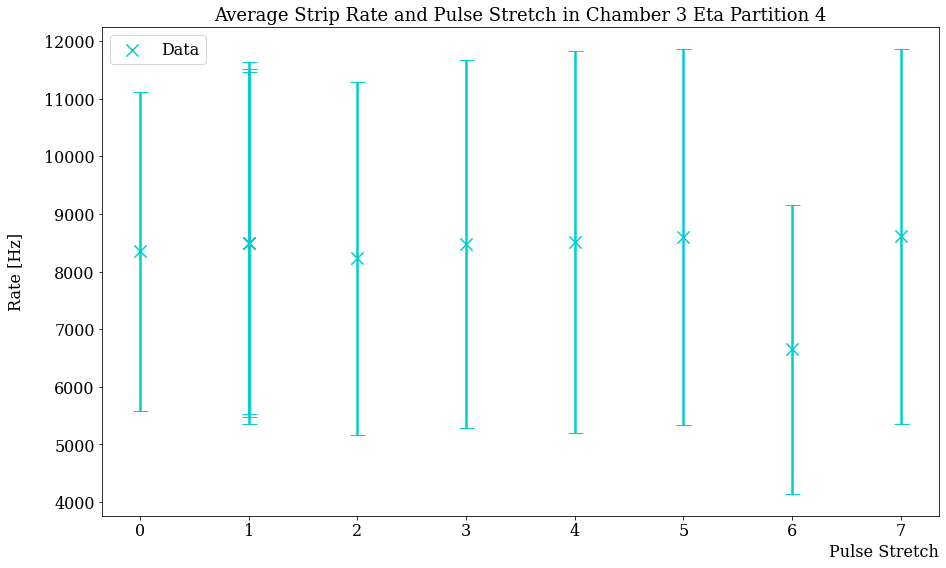

In [4]:
def over_x(x, C, B, D):
    return ( C / (x+B) ) + D

runs = {350:0, 351:1, 352:1, 353:1, 354:2, 355:3, 356:4, 357:5, 358:6, 359:7}

data_chamber = {}
data_eta = {}
data_av_strip = {}
data_strip = {}

chambers = []
chamber_rate = []
eta_rate = []

unique_chambers = [0,1,2,3]

unique_etas = [1,2,3,4]

font_title = {'family':'serif','color':'black','size':18}
font_axes = {'family':'serif','color':'black','size':16}
font_ticks = {'family':'serif','color':'black','size':16}
font_legend = {'family':'serif', 'size':16}

for run in runs.keys():
    
    temp = pd.read_csv("Rate_per_Chamber_Run-"+str(run)+".csv")
    data_chamber[run]=temp

    temp = pd.read_csv("Rate_per_Eta_Run-"+str(run)+".csv")
    data_eta[run]=temp
    
    temp = pd.read_csv("Average_Rate_per_Strip_Run-"+str(run)+".csv")
    data_av_strip[run]= temp
    
    temp = pd.read_csv("Rate_per_Strip_Run-"+str(run)+".csv")
    data_strip[run]=temp

ind = 0
for ch in unique_chambers:
    
    for et in unique_etas:
    
        x = []
        y = []
        y_err = []

        for run in data_eta.keys():

            temp1 = data_av_strip[run]
            cut1 = temp1["Chamber"] == ch
            cut2 = temp1["Eta"] == et
            cut_sum = np.logical_and(cut1, cut2)
            temp1 = temp1[cut_sum]

            x.append(runs[run])
            y.append(temp1["Average Strip Rate"][ind])
            y_err.append(temp1["Uncertainty in the Mean"][ind])
            
        fig, ax = plt.subplots(1,1)

        fig.set_size_inches(15, 9)

        plt.scatter( x, y, marker = 'x', s = 150, label = 'Data', color = "darkturquoise")
        plt.errorbar( x, y, yerr=y_err, linestyle='', elinewidth=2.5, capsize=7.5, color = 'darkturquoise')

        plt.xlabel('Pulse Stretch', loc = 'right',fontdict = font_axes)
        plt.ylabel('Rate [Hz]', loc = 'center', fontdict = font_axes, labelpad = 20)
        plt.xticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
        plt.yticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
        ax.set_title("Average Strip Rate and Pulse Stretch in Chamber "+str(ch)+" Eta Partition "+str(et), fontdict = font_title)

        plt.legend(prop = font_legend)

        plt.show()

        plt.close()
        
        ind+=1

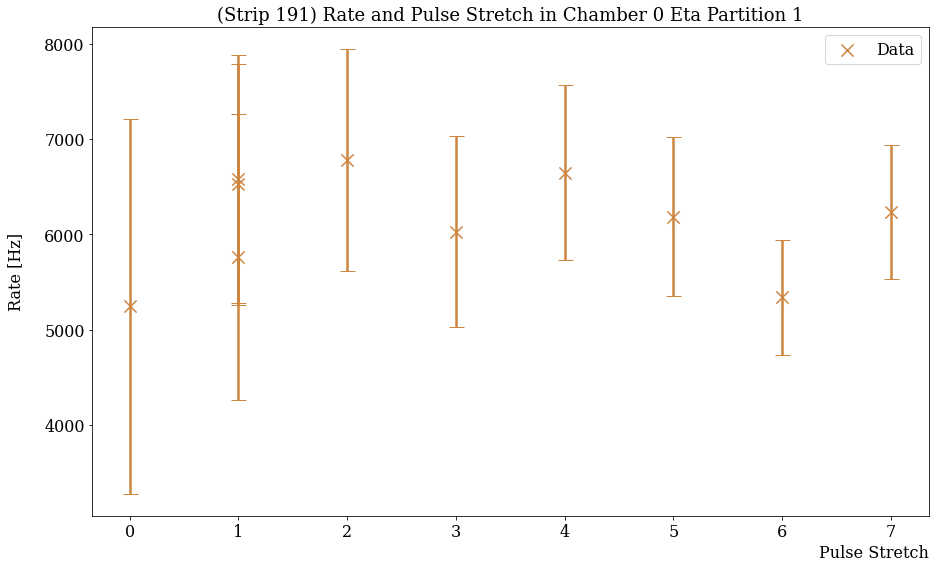

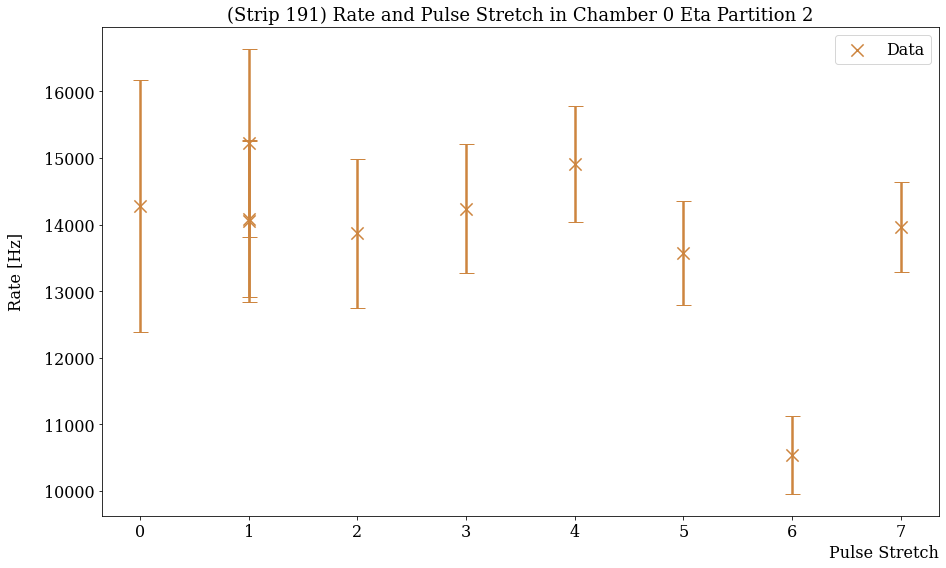

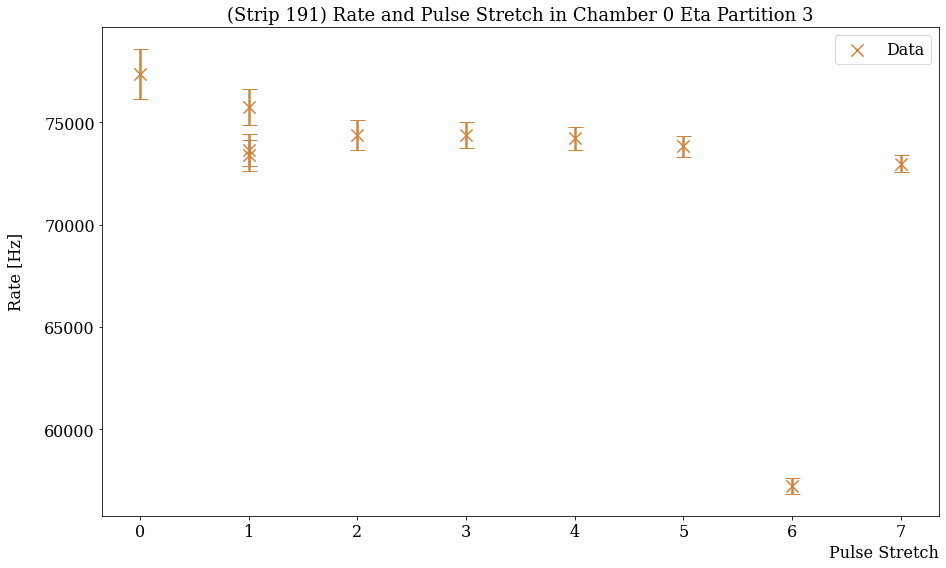

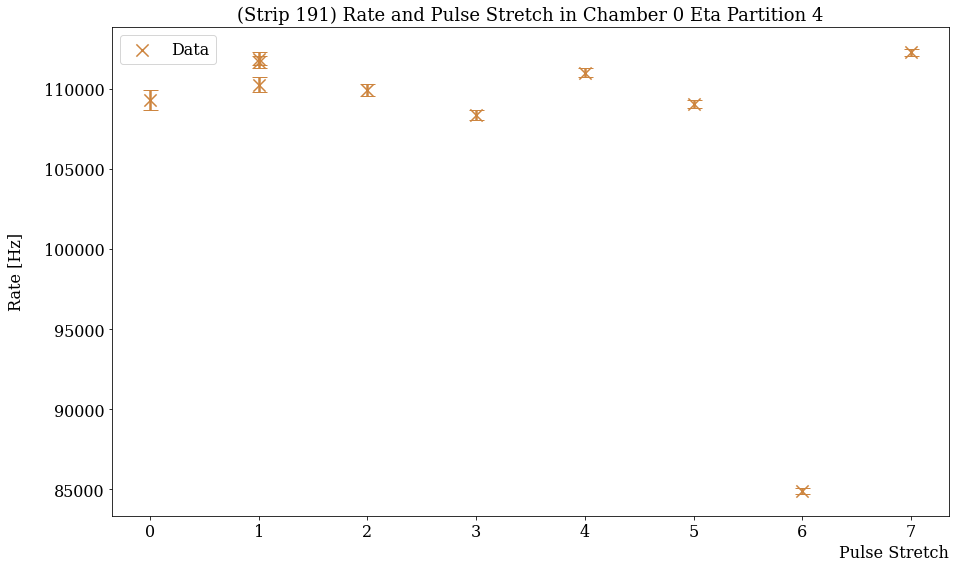

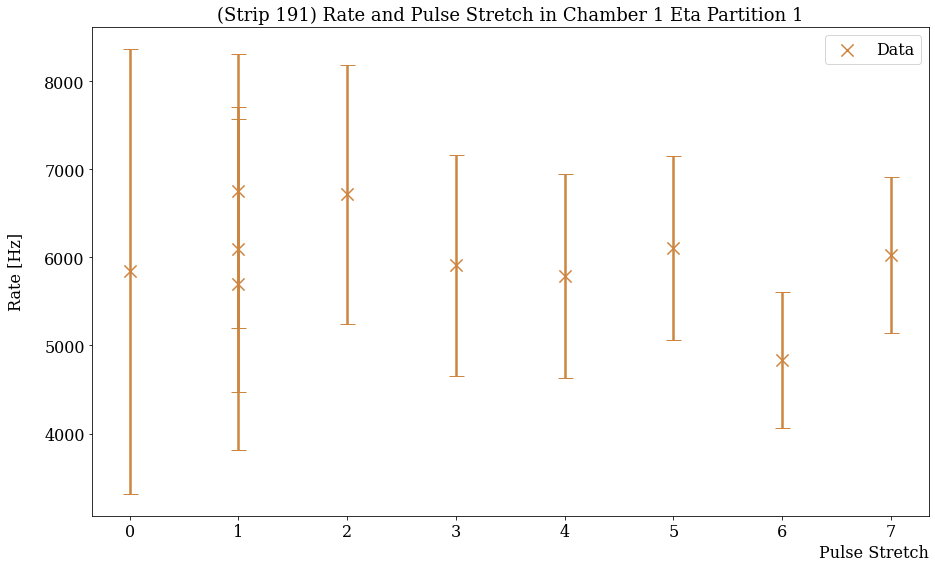

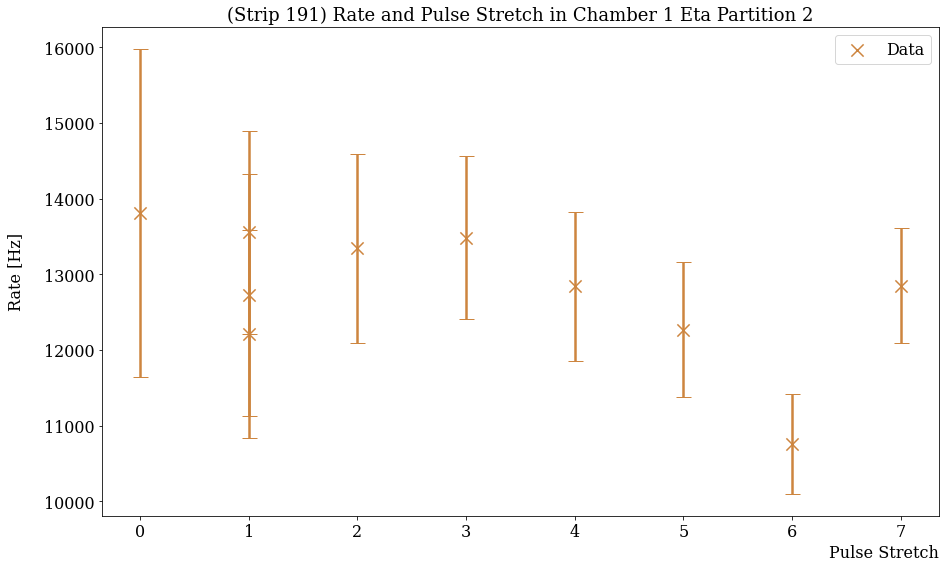

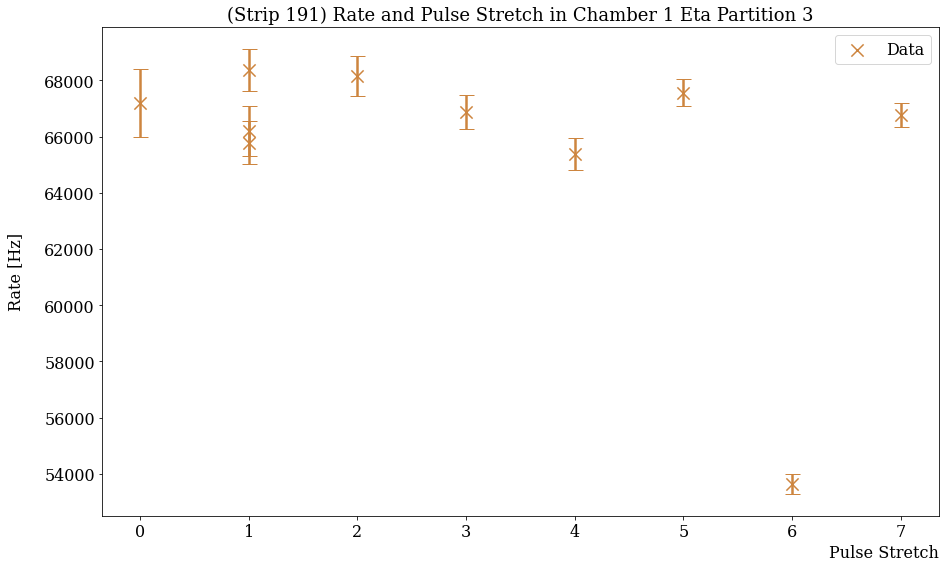

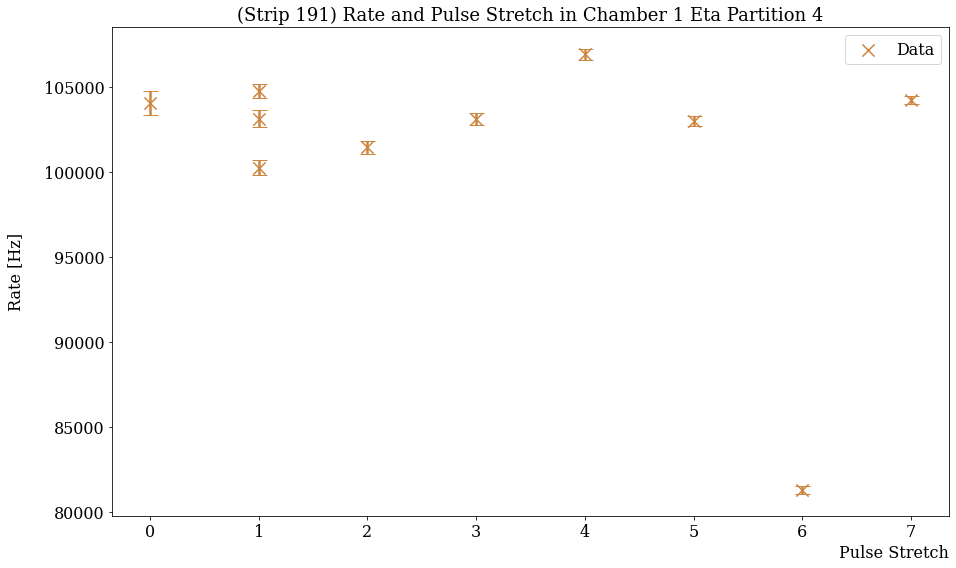

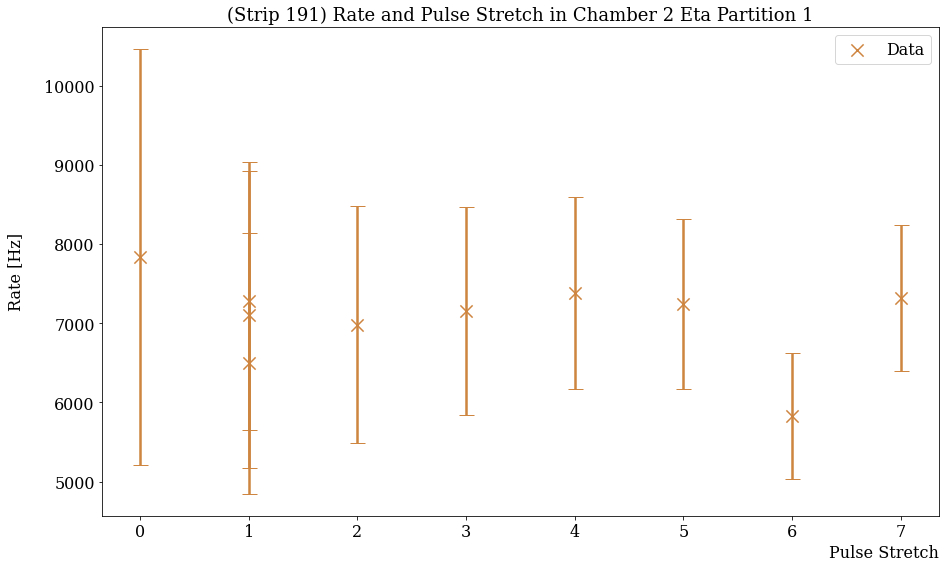

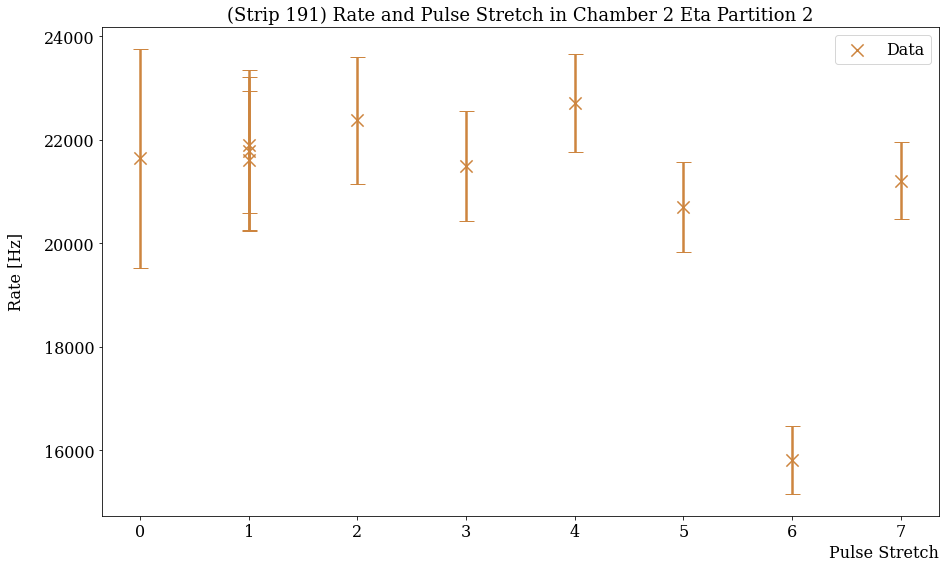

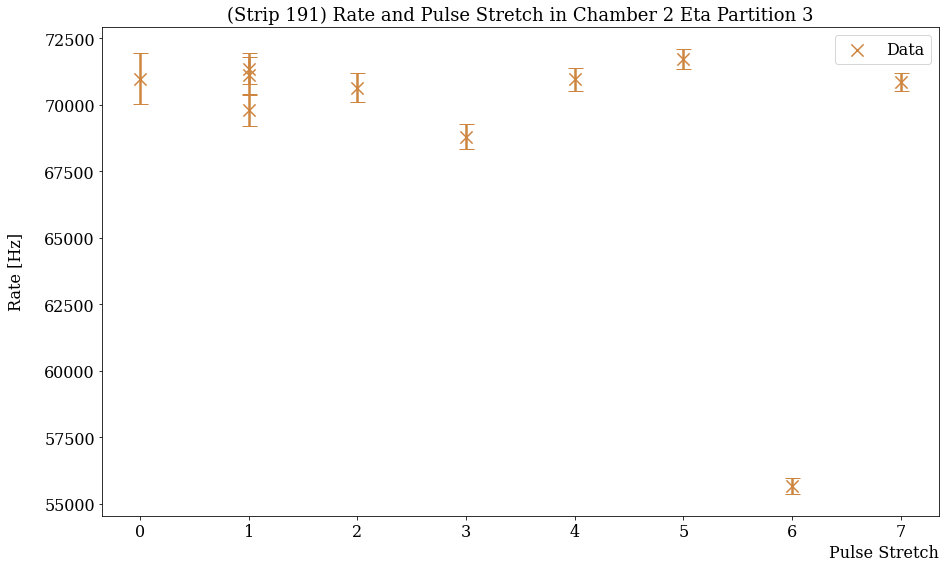

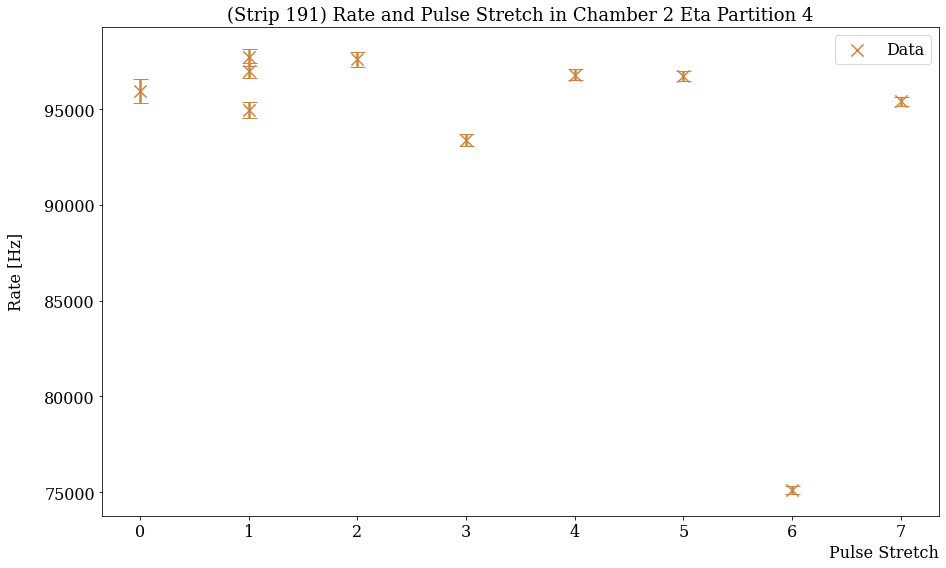

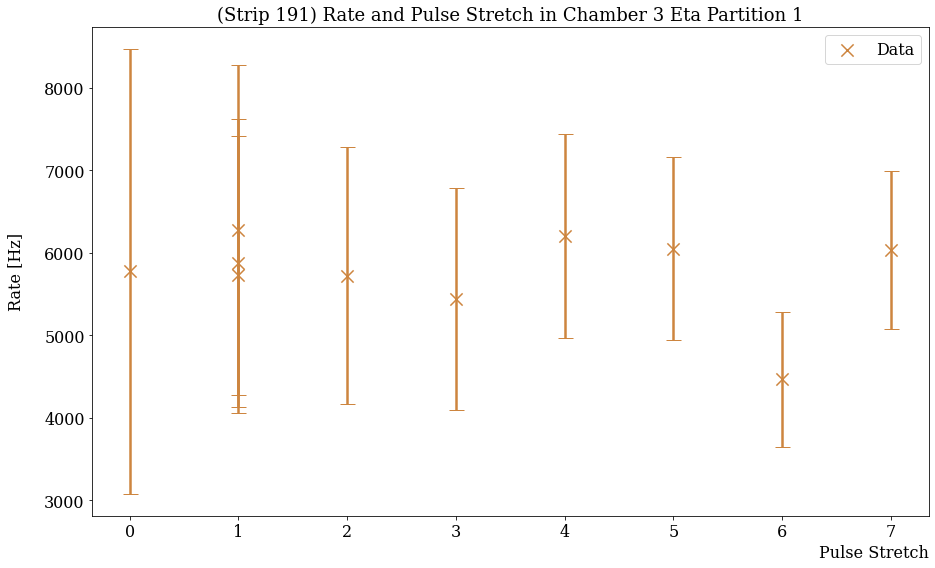

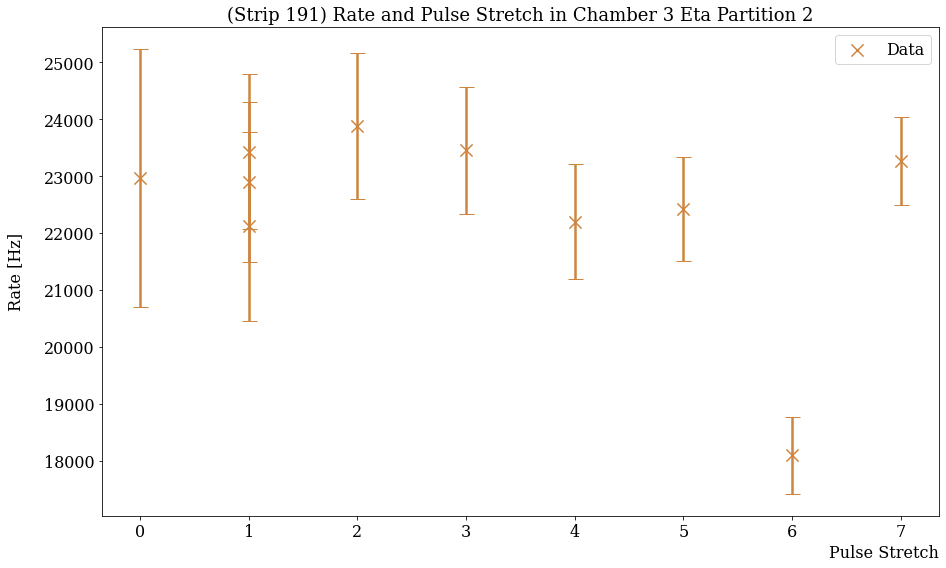

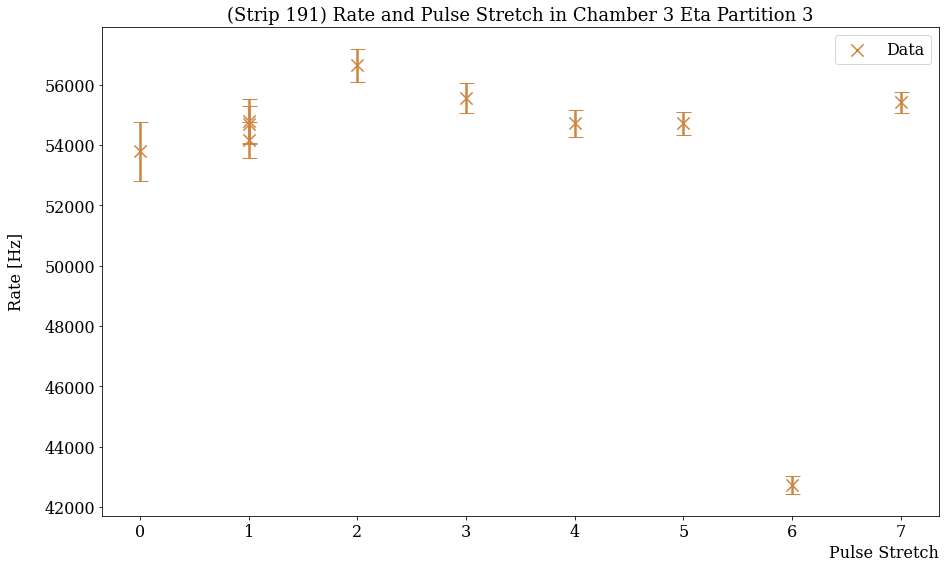

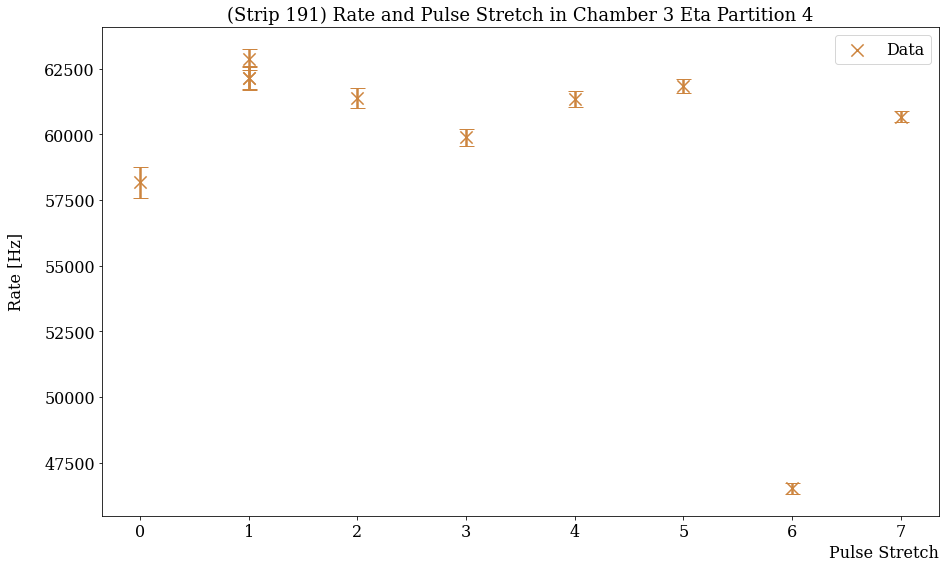

In [5]:
def over_x(x, C, B, D):
    return ( C / (x+B) ) + D

runs = {350:0, 351:1, 352:1, 353:1, 354:2, 355:3, 356:4, 357:5, 358:6, 359:7}

data_chamber = {}
data_eta = {}
data_av_strip = {}
data_strip = {}

chambers = []
chamber_rate = []
eta_rate = []

unique_chambers = [0,1,2,3]

unique_etas = [1,2,3,4]

font_title = {'family':'serif','color':'black','size':18}
font_axes = {'family':'serif','color':'black','size':16}
font_ticks = {'family':'serif','color':'black','size':16}
font_legend = {'family':'serif', 'size':16}

for run in runs.keys():
    
    temp = pd.read_csv("Rate_per_Chamber_Run-"+str(run)+".csv")
    data_chamber[run]=temp

    temp = pd.read_csv("Rate_per_Eta_Run-"+str(run)+".csv")
    data_eta[run]=temp
    
    temp = pd.read_csv("Average_Rate_per_Strip_Run-"+str(run)+".csv")
    data_av_strip[run]= temp
    
    temp = pd.read_csv("Rate_per_Strip_Run-"+str(run)+".csv")
    data_strip[run]=temp

    ind=0
for ch in unique_chambers:
    
    for et in unique_etas:
    
        x = []
        y = []
        y_err = []

        for run in data_eta.keys():

            temp1 = data_strip[run]
            cut1 = temp1["Chamber"] == ch
            cut2 = temp1["Eta"] == et
            cut_sum = np.logical_and(cut1, cut2)
            cut3 = temp1["Strip"] == 191
            cut_sum = np.logical_and(cut_sum,cut3)
            temp1 = temp1[cut_sum]

            x.append(runs[run])
            y.append(temp1["Strip Rate"][192+(ind*385)])
            y_err.append(temp1["Error"][192+(ind*385)])
            
        fig, ax = plt.subplots(1,1)

        fig.set_size_inches(15, 9)

        plt.scatter( x, y, marker = 'x', s = 150, label = 'Data', color = "peru")
        plt.errorbar( x, y, yerr=y_err, linestyle='', elinewidth=2.5, capsize=7.5, color = 'peru')

        plt.xlabel('Pulse Stretch', loc = 'right',fontdict = font_axes)
        plt.ylabel('Rate [Hz]', loc = 'center', fontdict = font_axes, labelpad = 20)
        plt.xticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
        plt.yticks(fontsize = font_ticks['size'], fontname = font_ticks['family'])
        ax.set_title("(Strip 191) Rate and Pulse Stretch in Chamber "+str(ch)+" Eta Partition "+str(et), fontdict = font_title)

        plt.legend(prop = font_legend)

        plt.show()

        plt.close()
        
        ind+=1